# Global Terrorism Data Analysis


Ryerson University                                                                          

Student: Emil Ibrahim  

Course: CKM136XJ0 Capstone

Student Id: 500862456

Supervisor: Dr.Can Kavaklioglu


# Import Modules

In [1]:
print ("Importing Moduels...")

import warnings
warnings.filterwarnings('ignore')

# For calculations and data 
import numpy as np
import pandas as pd

# For plooting and graphes
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.offline as py
from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats
import matplotlib.patches as mpatches

# For Data preprocessing
from sklearn.preprocessing import LabelEncoder

# For Experimental Desgin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.decomposition import PCA
import itertools

# For Modeling
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

# For Validation
from sklearn.dummy import DummyClassifier

#For NLP 
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

print(" ")
print ("All modules imported successfully" )


Importing Moduels...
 
All modules imported successfully


In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Load dataset

In [2]:
# Read the dataframe
mydata = pd.read_csv('../code/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [126]:
mydata.shape

(181691, 135)

In [236]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to dbsource
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [237]:
mydata.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'summary', 'crit1', 'crit2',
       ...
       'nreleased', 'addnotes', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',
       'scite1', 'scite2', 'scite3', 'dbsource'],
      dtype='object', length=135)

In [238]:
mydata.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,summary,crit1,crit2,...,nreleased,addnotes,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,scite3,dbsource
0,1.970000e+11,1970,7,2,NaN,0,NaN,NaN,1,1,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,PGIS
1,1.970000e+11,1970,0,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,0,1,1,1,NaN,NaN,NaN,PGIS
2,1.970010e+11,1970,1,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,-9,-9,1,1,NaN,NaN,NaN,PGIS
3,1.970010e+11,1970,1,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,-9,-9,1,1,NaN,NaN,NaN,PGIS
4,1.970010e+11,1970,1,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,-9,-9,1,1,NaN,NaN,NaN,PGIS


# Initial Analysis

## Univariate Analysis 



(detailed data dictionary / list all vaibles and understand what each varible mean and represent)(what is the source of each varible directly measured or calculated based on other varibles or does the vaible has a time domain assoicated) - (Decide on the dependent (target) varibale) (Assigning the corrcet data types and appropriate column names)(for numeric attributes check the 5 number summary min 1sQ mean 3rdQ max  )(for categrical attributes check and decide on the levels , frequency) (check and deal with data inconsistencies , missing values , erros , duplicates , outliers (boxplots) , numeric signs , upper and lower cases , spaces or spcial charachters in strigs) (check distributions of the varibales : Norml distirbution?)(Low variance filter)(check the imbalance in the dependent varbalie) (check time varbiles) (Univariate visulaizations)



In [239]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to dbsource
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [87]:
num1 = mydata.select_dtypes(include =['float64'])
num2 = mydata.select_dtypes(include =['int64'])
obj1 = mydata.select_dtypes(include =['object'])


In [241]:
num1.shape

(181691, 56)

In [242]:
num2.shape

(181691, 21)

In [243]:
obj1.shape

(181691, 58)

In [25]:
num1.columns

Index(['eventid', 'doubtterr', 'alternative', 'multiple', 'latitude',
       'longitude', 'specificity', 'attacktype2', 'attacktype3',
       'weapsubtype1', 'weaptype2', 'weapsubtype2', 'weaptype3',
       'weapsubtype3', 'weaptype4', 'weapsubtype4', 'targsubtype1', 'natlty1',
       'targtype2', 'targsubtype2', 'natlty2', 'targtype3', 'targsubtype3',
       'natlty3', 'guncertain1', 'guncertain2', 'guncertain3', 'nperps',
       'nperpcap', 'claimed', 'claimmode', 'compclaim', 'claim2', 'claimmode2',
       'claim3', 'claimmode3', 'nkill', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'propextent', 'propvalue', 'ishostkid',
       'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'ransom', 'ransomamt',
       'ransomamtus', 'ransompaid', 'ransompaidus', 'hostkidoutcome',
       'nreleased'],
      dtype='object')

In [26]:
num2.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'crit1', 'crit2', 'crit3',
       'country', 'region', 'vicinity', 'attacktype1', 'success', 'suicide',
       'weaptype1', 'targtype1', 'individual', 'property', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [27]:
obj1.columns

Index(['approxdate', 'resolution', 'summary', 'alternative_txt', 'related',
       'country_txt', 'region_txt', 'provstate', 'city', 'location',
       'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt',
       'weaptype1_txt', 'weapsubtype1_txt', 'weaptype2_txt',
       'weapsubtype2_txt', 'weaptype3_txt', 'weapsubtype3_txt',
       'weaptype4_txt', 'weapsubtype4_txt', 'weapdetail', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'targtype2_txt',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gname',
       'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
       'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'motive',
       'propextent_txt', 'propcomment', 'divert', 'kidhijcountry',
       'ransomnote', 'hostkidoutcome_txt', 'addnotes', 'scite1', 'scite2',
       'scite3', 'dbsource'],
      dtype='object')

In [29]:
obj1.describe()

,approxdate,resolution,summary,alternative_txt,related,country_txt,region_txt,provstate,city,location,...,propcomment,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource
count,9239,2220,115562,29011,25038,181691,181691,181270,181257,55495,...,57959,324,3305,514,10991,28289,115500,76933,43516,181691
unique,2244,1859,112492,5,14306,205,12,2855,36674,44109,...,19157,143,217,387,7,15429,83988,62263,36090,26
top,"September 18-24, 2016",8/04/98,"09/00/2016: Sometime between September 18, 201...",Insurgency/Guerilla Action,"201612010023, 201612010024, 201612010025, 2016...",Iraq,Middle East & North Africa,Baghdad,Unknown,"The attack took place in Baghdad, Baghdad, Iraq.",...,It is unknown if any property was damaged in t...,Unknown,Colombia,0,Unknown,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection
freq,101,18,100,23410,80,24636,50474,7645,9775,142,...,6966,27,687,36,3606,1607,205,134,139,78002


In [25]:
# mydata[['nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 
#         'nwoundus', 'nwoundte']].dropna().describe(
#     percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]).transpose()

In [1]:
# plt.figure(figsize=(10,50))
# j=0
# for i in num1.columns:
#     j=j+1
#     plt.subplot (14,4,j)
#     plt.boxplot(num1[i]);
#     plt.title (num1.columns[j-1]);

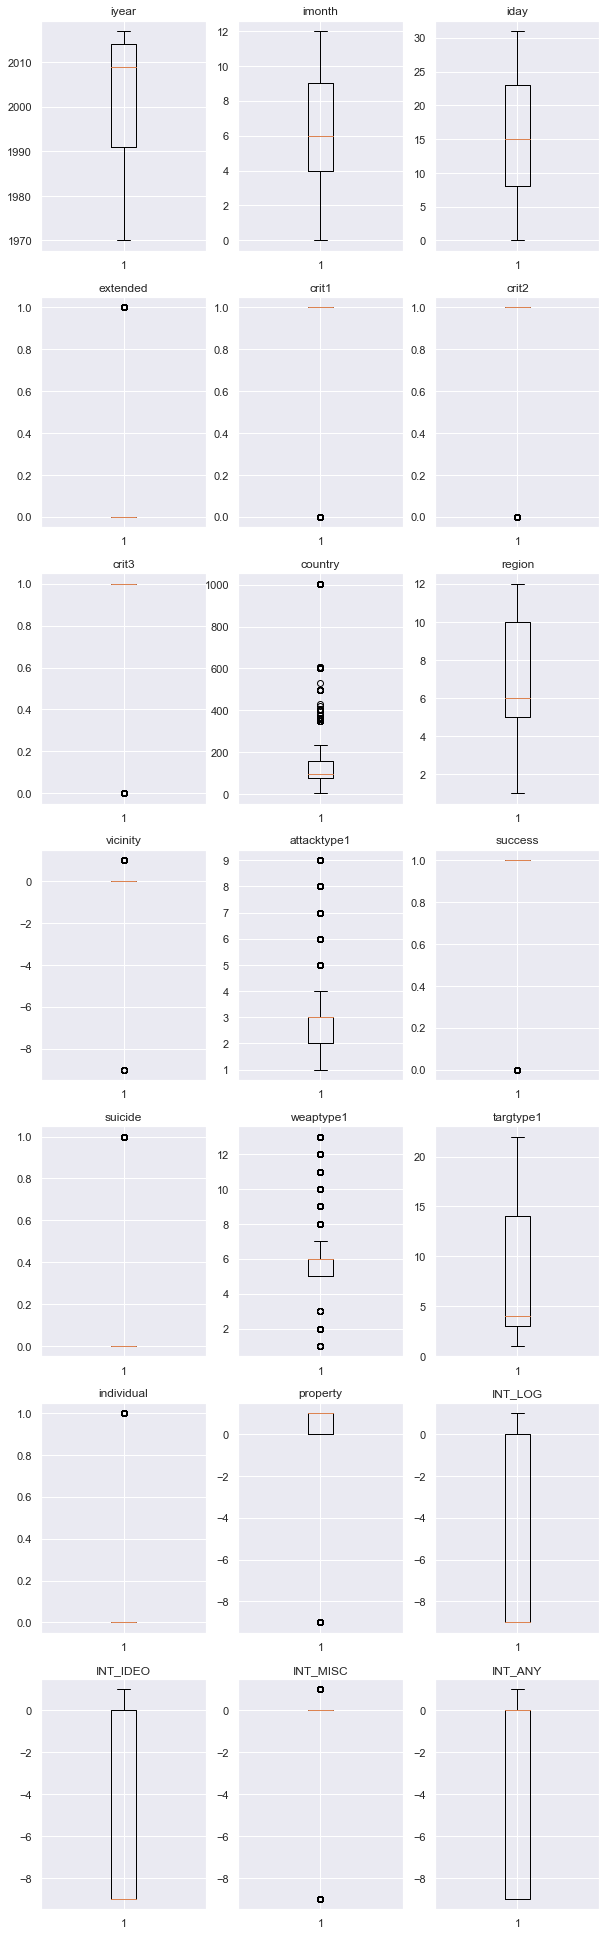

In [81]:
plt.figure(figsize=(10,50))
j=0
for i in num2.columns:
    j=j+1
    plt.subplot (10,3,j)
    plt.boxplot(num2[i]);
    plt.title (num2.columns[j-1]);



In [2]:
# plt.figure(figsize=(10,50))
# j=0
# for i in obj1.columns:
#     j=j+1
#     plt.subplot (15,4,j)
#     plt.hist(obj1[i].value_counts());
#     plt.title (obj1.columns[j-1]);

In [56]:
mydata.describe()

,eventid,iyear,imonth,iday,extended,crit1,crit2,crit3,doubtterr,alternative,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,0.988530,0.993093,0.875668,-0.523171,1.292923,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,0.106483,0.082823,0.329961,2.455819,0.703729,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
mydata['iyear'].describe()

count    181691.000000
mean       2002.638997
std          13.259430
min        1970.000000
25%        1991.000000
50%        2009.000000
75%        2014.000000
max        2017.000000
Name: iyear, dtype: float64

In [58]:
mydata['success'].describe()

count    181691.000000
mean          0.889598
std           0.313391
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: success, dtype: float64

In [59]:
mydata['country_txt'].describe()

count     181691
unique       205
top         Iraq
freq       24636
Name: country_txt, dtype: object

In [60]:
#list the levels
mydata['country_txt'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [61]:
# Frequency
mydata['country_txt'].value_counts()

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


In [3]:
mydata['gname'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [4]:
mydata['gname'].value_counts()

Unknown                                                                82782
Taliban                                                                 7478
Islamic State of Iraq and the Levant (ISIL)                             5613
Shining Path (SL)                                                       4555
Farabundo Marti National Liberation Front (FMLN)                        3351
Al-Shabaab                                                              3288
New People's Army (NPA)                                                 2772
Irish Republican Army (IRA)                                             2671
Revolutionary Armed Forces of Colombia (FARC)                           2487
Boko Haram                                                              2418
Kurdistan Workers' Party (PKK)                                          2310
Basque Fatherland and Freedom (ETA)                                     2024
Communist Party of India - Maoist (CPI-Maoist)                          1878

Text(0, 0.5, 'number')

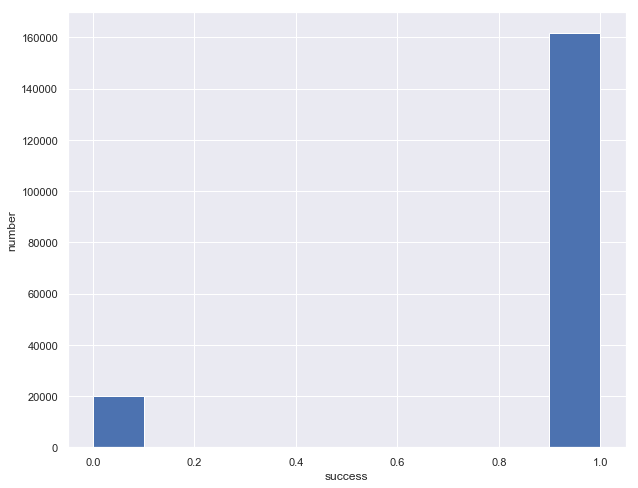

In [65]:
#Histogram 
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
mydata['success'].plot.hist(ax=ax)
ax.set_xlabel('success')
ax.set_ylabel('number')


Text(0, 0.5, 'number incedent')

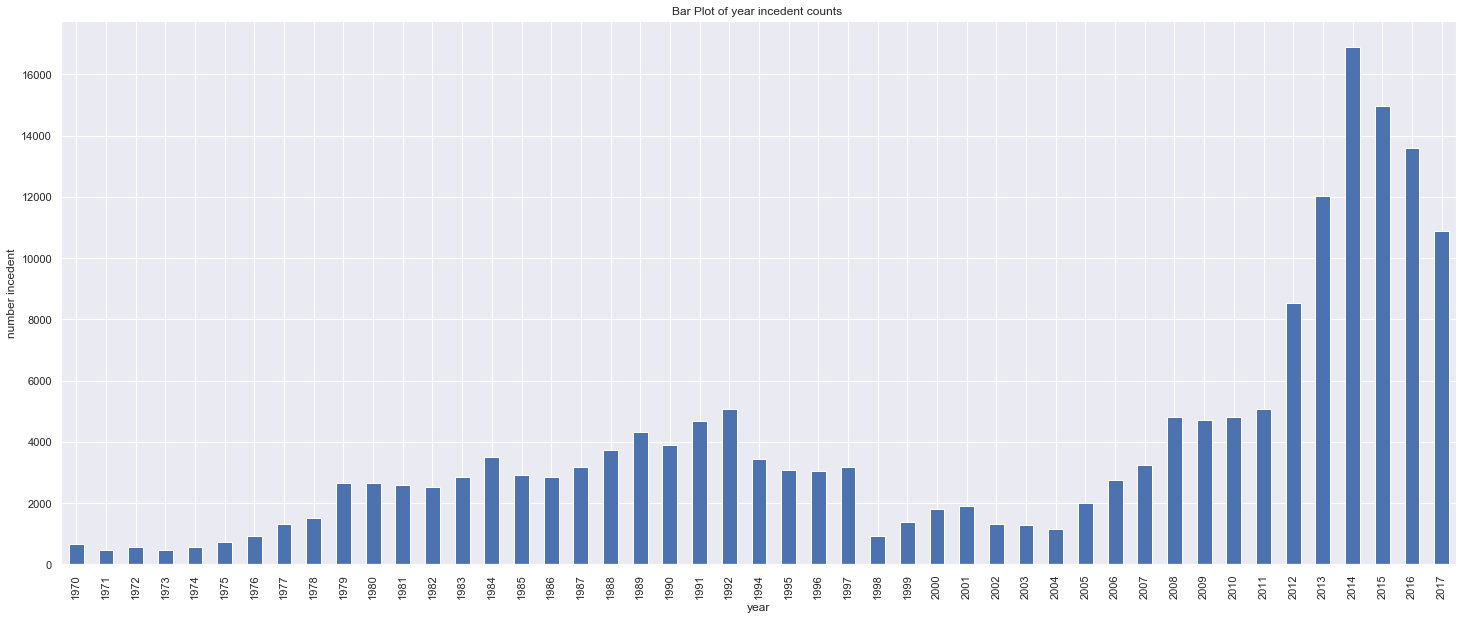

In [66]:
#Bar plot (for discrte/ categoral  data)
counts = mydata['iyear'].value_counts(sort= False)
fig = plt.figure(figsize=(25,10))
ax =fig.gca()
counts[0:].plot.bar(ax = ax)
ax.set_title('Bar Plot of year incedent counts ')
ax.set_xlabel('year')
ax.set_ylabel('number incedent')

Text(0, 0.5, 'number incedent')

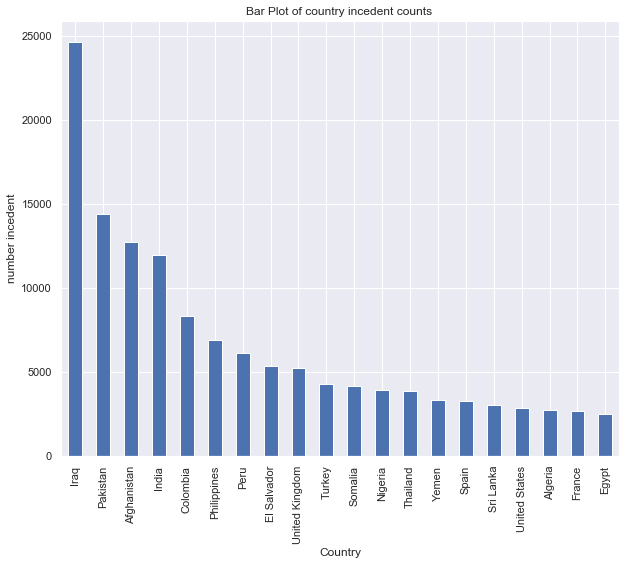

In [67]:
#Bar plot
counts = mydata['country_txt'].value_counts()
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of country incedent counts ')
ax.set_xlabel('Country')
ax.set_ylabel('number incedent')

In [8]:
#sns.distplot(mydata['eventid'])

In [68]:
counts = mydata['country_txt'].value_counts()
counts

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


In [9]:
#print("Skewness: %f" % mydata['eventid'].skew())
#print("Kurtosis: %f" % mydata['eventid'].kurt())

Cleaning Data

Based on the codebook and detailed data dictionary for the dataset (files can be found on the documents folder): (crit1, crit2, crit3 , doubtterr) record which of the inclusion criteria are met. to filter out those incidents whose inclusion was based on a criterion which they believe does constitute terrorism proper.

Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1) = 1 

Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) (CRIT2) =1

Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3) =1

Doubt Terrorism Proper? (doubtterr) =0


In [3]:
mydata = mydata[(mydata.crit1 == 1) & (mydata.crit2 == 1) & (mydata.crit3 == 1) & (mydata.doubtterr == 0)]

In [112]:
mydata.shape

(138879, 135)

Dealing with null values

In [7]:
#mydata.isnull().sum()

In [58]:
mydata.shape[0]

181691

In [59]:
#Null value 
#100*mydata.isnull().sum()/mydata.shape[0]

In [60]:
# find Null value , calculate % of missing value from total , sort de-ascending
list1 =100*mydata.isnull().sum()/mydata.shape[0]
list1.sort_values(ascending=False)

gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4_txt       99.959822
weaptype4           99.959822
claimmode3_txt      99.926799
claimmode3          99.926799
gsubname2           99.911938
claim3              99.824978
guncertain3         99.823877
gname3              99.821675
divert              99.821675
attacktype3_txt     99.764435
attacktype3         99.764435
ransomnote          99.717102
ransompaidus        99.696187
ransomamtus         99.690133
claimmode2_txt      99.660963
claimmode2          99.660963
ransompaid          99.574002
corp3               99.435305
targsubtype3_txt    99.396228
targsubtype3        99.396228
natlty3_txt         99.368708
natlty3             99.368708
target3             99.353298
targtype3           99.352747
targtype3_txt       99.352747
ransomamt           99.256980
weapsubtype3_txt    99.068198
                      ...    
doubtterr            0.000550
country              0.000000
iyear     

In [4]:
#droping more than 75% Null values attributes
mylist = []
for i in mydata:
    if 100*mydata[i].isnull().sum()/mydata.shape[0] > 75:
        mylist.append(i)

In [5]:
len(mylist)

69

In [116]:
mylist

['approxdate',
 'resolution',
 'alternative',
 'alternative_txt',
 'related',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'guncertain2',
 'guncertain3',
 'claimmode',
 'claimmode_txt',
 'compclaim',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'propvalue',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransomamt',
 'ransomamtus',
 'ransompaid',
 'ransompaidus',
 'ransomnote',


In [6]:
mydata = mydata.drop(mylist,axis=1)

In [7]:
mydata.shape

(138879, 66)

In [64]:
#Null value 
list1 =100*mydata.isnull().sum()/mydata.shape[0]
list1.sort_values(ascending=False)

motive              72.171984
location            69.456385
propcomment         68.100236
propextent_txt      64.739585
propextent          64.739585
scite2              57.657231
ransom              57.410659
nperps              39.140629
nperpcap            38.245703
nwoundte            38.055270
weapdetail          37.244553
nkillter            36.852678
scite1              36.430533
summary             36.396409
claimed             36.391456
nwoundus            35.611010
nkillus             35.470111
corp1               23.418882
weapsubtype1_txt    11.430396
weapsubtype1        11.430396
nwound               8.977330
targsubtype1_txt     5.709144
targsubtype1         5.709144
nkill                5.676120
longitude            2.508104
latitude             2.507554
natlty1_txt          0.858050
natlty1              0.858050
target1              0.350045
city                 0.238867
                      ...    
multiple             0.000550
crit2                0.000000
crit3     

In [102]:
mydata.head()

,eventid,iyear,imonth,iday,extended,summary,crit1,crit2,crit3,doubtterr,...,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,scite3,dbsource
0,1.970000e+11,1970,7,2,0,NaN,1,1,1,0.0,...,0.0,0.0,0,0,0,0,NaN,NaN,NaN,PGIS
1,1.970000e+11,1970,0,0,0,NaN,1,1,1,0.0,...,1.0,1.0,0,1,1,1,NaN,NaN,NaN,PGIS
2,1.970010e+11,1970,1,0,0,NaN,1,1,1,0.0,...,0.0,0.0,-9,-9,1,1,NaN,NaN,NaN,PGIS
3,1.970010e+11,1970,1,0,0,NaN,1,1,1,0.0,...,0.0,0.0,-9,-9,1,1,NaN,NaN,NaN,PGIS
5,1.970010e+11,1970,1,1,0,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,...,0.0,0.0,-9,-9,0,-9,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project


In [8]:
# set text to lower case
mydata.target1 = mydata.target1.str.lower()
mydata.gname = mydata.gname.str.lower()
mydata.summary = mydata.summary.str.lower()    
mydata.city = mydata.city.str.lower()
mydata.weapsubtype1_txt = mydata.weapsubtype1_txt.str.lower()
mydata.natlty1_txt = mydata.natlty1_txt.str.lower()
mydata.provstate = mydata.provstate.str.lower()

mydata.country_txt = mydata.country_txt.str.lower()
mydata.region_txt =  mydata.region_txt.str.lower()
mydata.attacktype1_txt  = mydata.attacktype1_txt.str.lower()
mydata.targtype1_txt   = mydata.targtype1_txt.str.lower()


In [9]:
#fill null vaules 
mydata['weapsubtype1_txt'].fillna('No Record', inplace=True)
mydata['natlty1_txt'].fillna('unknown', inplace=True)
mydata['target1'].fillna('unknown', inplace=True)
mydata['city'].fillna('unknown', inplace=True)
mydata['provstate'].fillna('unknown', inplace=True)

mydata['country_txt'].fillna('unknown', inplace=True)
mydata['region_txt'].fillna('unknown', inplace=True)
mydata['attacktype1_txt'].fillna('unknown', inplace=True) 
mydata['targtype1_txt'].fillna('unknown', inplace=True)

In [10]:
#replaceve unk with unknown
mydata.target1 = mydata.target1.replace('unk','unknown')

In [11]:
# fill missing value for nkill and nwound with the median
mydata.nkill = np.round(mydata.nkill.fillna(mydata.nkill.median())).astype(int) 
mydata.nwound = np.round(mydata.nwound.fillna(mydata.nwound.median())).astype(int) 

In [12]:
mydata.weaptype1_txt.replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle', inplace = True)

## BiVariate Analysis 

(pairwise relations) (pairwise visuliazations like scatter plots) (correlation analysis spearman or pearson)

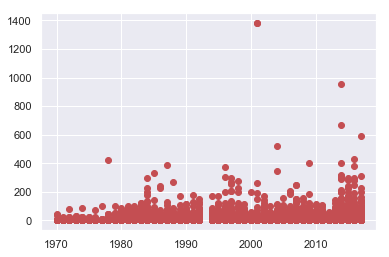

In [87]:
#scatter plot (ro = red dot) using matplot.lib
plt.plot(mydata['iyear'] , mydata['nkill'],'ro')

In [93]:
#scatter plot2 using pandas
#mydata.plot(kind='scatter' , x= 'iyear' , y= 'nkill')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


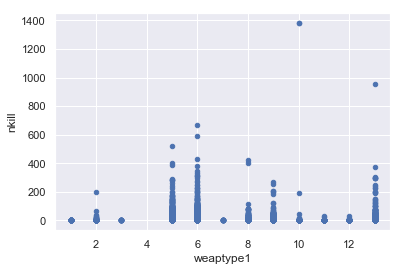

In [89]:
#scatter plot2 using pandas
mydata.plot(kind='scatter' , x= 'weaptype1' , y= 'nkill')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'number of killed people')

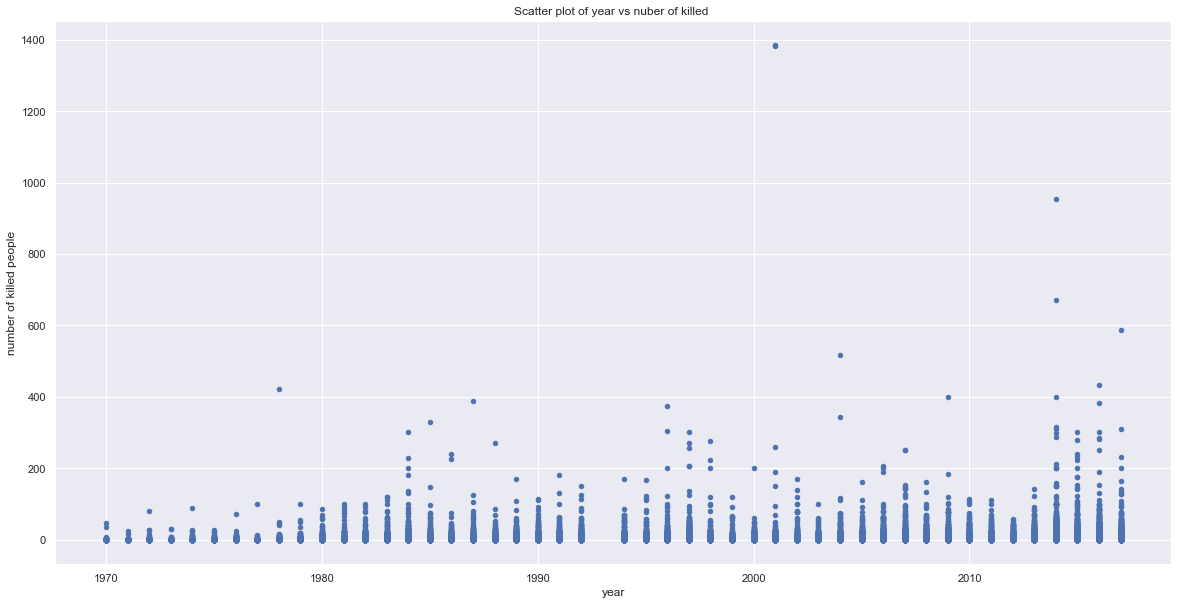

In [90]:
fig = plt.figure(figsize=(20,10))
ax =fig.gca()
mydata.plot(kind='scatter' , x= 'iyear' , y= 'nkill' , ax = ax)
ax.set_title('Scatter plot of year vs nuber of killed ')
ax.set_xlabel('year')
ax.set_ylabel('number of killed people')

In [92]:
#relationship numerical features (scatter plot)
#var = 'eventid'
#data = pd.concat([mydata['country'], mydata[var]], axis=1)
#data.plot.scatter(x=var, y='country' , ylim=(0,1000))

## Multivaritae Analysis 

(relations between more than 2 varibales)(statistical tools such as one way analysis or rank or to compare the means


(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 7 Text xticklabel objects>)

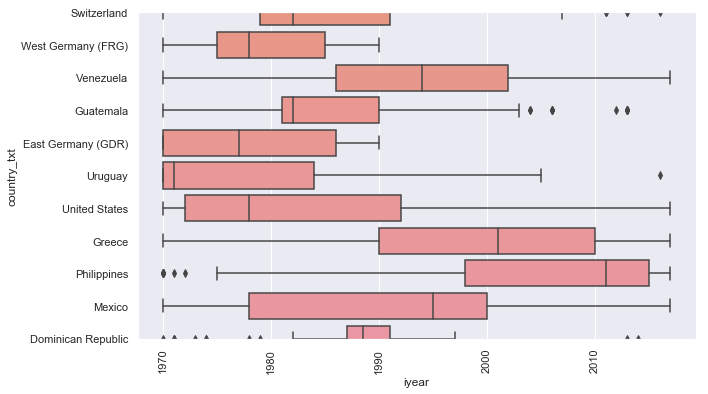

In [94]:
#relationship categorical features and outliers (boxplot)
var = 'iyear'
data = pd.concat([mydata['country_txt'], mydata[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="country_txt", data=data)
fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=90)

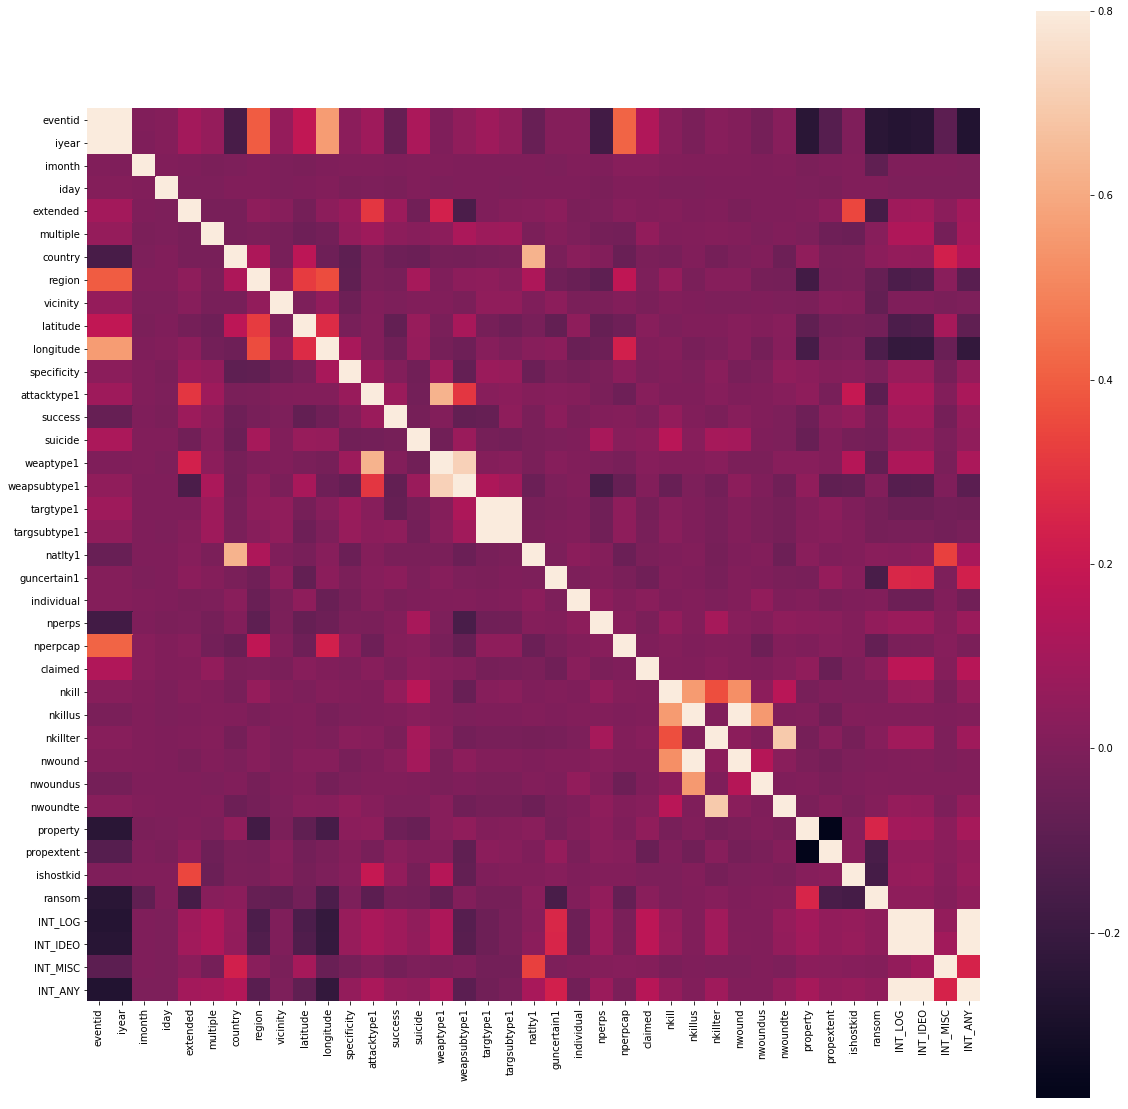

In [22]:
#correlation matrix
list1 = ['crit1' , 'crit2' , 'crit3' , 'doubtterr']
mydata1 = mydata.drop(list1,axis=1)
corrmat = mydata1.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

In [26]:
print(corrmat)

               eventid     iyear    imonth      iday  extended  multiple  \
eventid       1.000000  0.999996  0.004007  0.014850  0.096693  0.059129   
iyear         0.999996  1.000000  0.001357  0.014831  0.096677  0.059156   
imonth        0.004007  0.001357  1.000000  0.003922  0.001692 -0.008229   
iday          0.014850  0.014831  0.003922  1.000000 -0.005008 -0.003104   
extended      0.096693  0.096677  0.001692 -0.005008  1.000000 -0.016344   
multiple      0.059129  0.059156 -0.008229 -0.003104 -0.016344  1.000000   
country      -0.154362 -0.154356 -0.002700  0.002953 -0.019757 -0.020382   
region        0.394841  0.394837  0.004280  0.004714  0.041205 -0.006746   
vicinity      0.058498  0.058513 -0.004868 -0.006503  0.023766 -0.019158   
latitude      0.181472  0.181503 -0.010815  0.002566 -0.029089 -0.043818   
longitude     0.561917  0.561919  0.000815  0.007885  0.036014 -0.031342   
specificity   0.033280  0.033262  0.005125 -0.010652  0.069953  0.052731   
attacktype1 

In [99]:
#correlation matrix
#k = 10 #number of variables for heatmap
#cols = corrmat.nlargest(k, 'country')['country'].index
#cm = np.corrcoef(mydata[cols].values.T)
#sns.set(font_scale=1.25)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

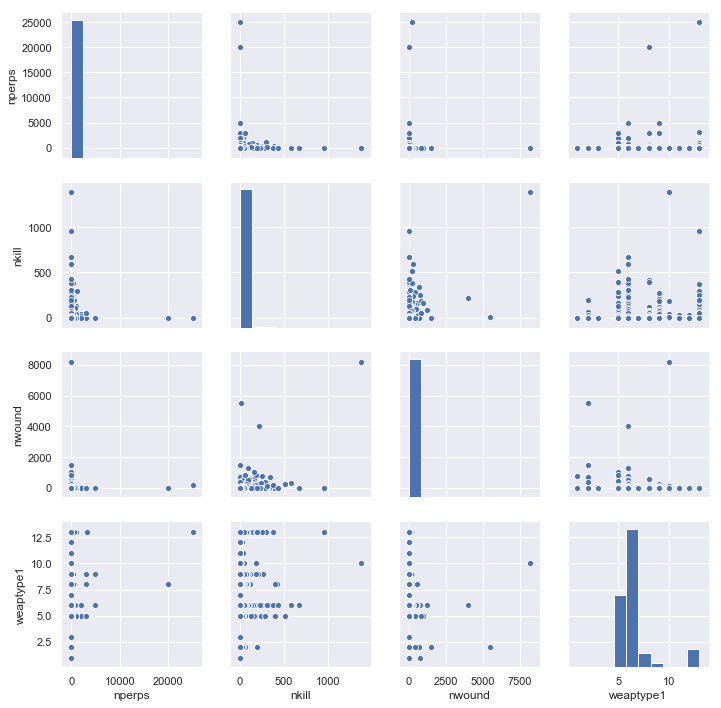

In [102]:
sns.set()
cols = ['nperps','nkill','nwound', 'weaptype1']
sns.pairplot(mydata[cols], height = 2.5)
plt.show();

## Exploratory Anaysis

Normalizing / scaling
Sub-setting the data (may foucs on one coutry or regin analysis or undersand the weapons used more ofen)
Decision rules , association rules , n grams
Clustring such as K-mean 
Hypotheise analysis (metntal inllness, education, GDP/economic,war status, unemployment ,internet growth / technlogy /telecom tech such as AlThuria phones, healthcare, weather, virtual currrencies such as cryptocoin, presedint of USA periods, UN head periods)
NLP analysis for some text attributes 


Text(0.5, 1.0, 'Terroist attacks nkill')

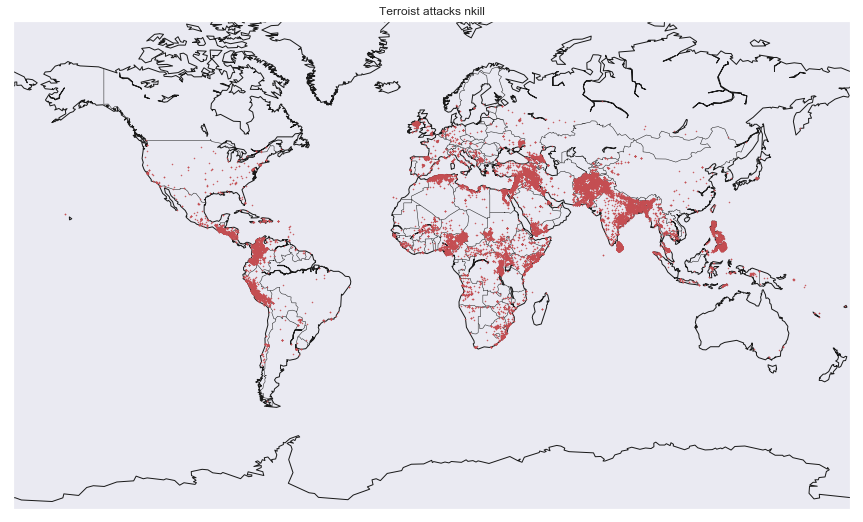

In [103]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(mydata[mydata['nkill'] >=1].latitude)
long_100=list(mydata[mydata['nkill']>=1].longitude)
x_100,y_100=m3(long_100, lat_100)
m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'r')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks nkill")

Text(0.5, 1.0, 'Terroist attacks nwounded')

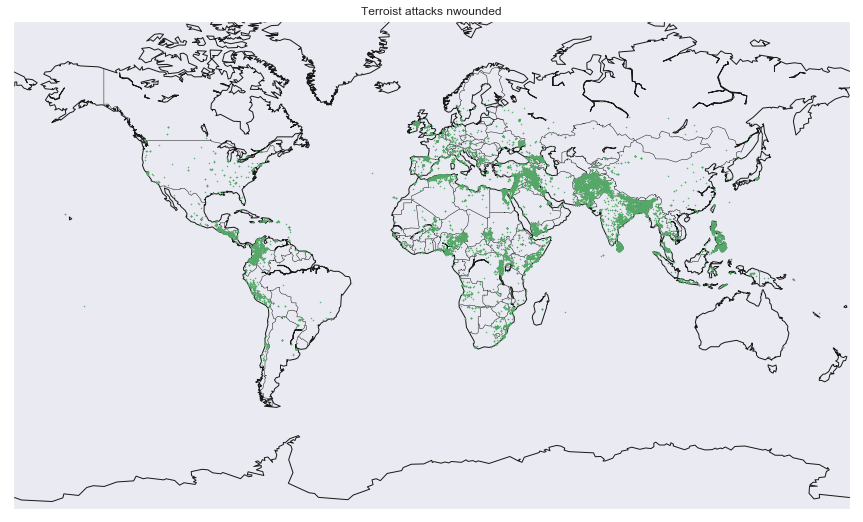

In [104]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(mydata[mydata['nwound'] >=1].latitude)
long_100=list(mydata[mydata['nwound']>=1].longitude)
x_100,y_100=m3(long_100, lat_100)
m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'g')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks nwounded")

Text(0.5, 1.0, 'Terroist attacks nkilled is red and nwound is blue')

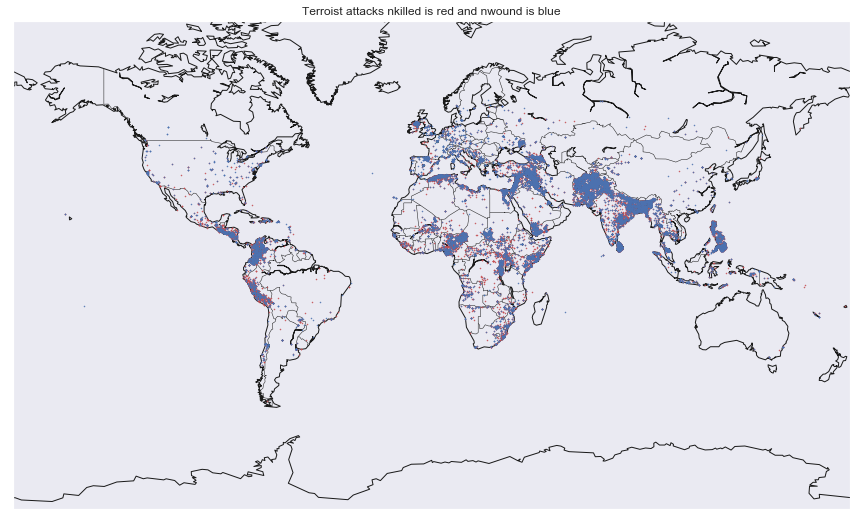

In [105]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100 = list(mydata[mydata['nkill'] >= 1].latitude)
#lat_100 = list(mydata[mydata['nwound'] >=1].latitude)
long_100 = list(mydata[mydata['nkill'] >= 1].longitude)

lat_200=list(mydata[(mydata['nwound'] >= 1)].latitude)
long_200=list(mydata[(mydata['nwound'] >= 1)].longitude)


x_100,y_100=m3(long_100, lat_100)
x_200,y_200=m3(long_200, lat_200)

m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'r')
m3.plot(x_200, y_200,'go',markersize=0.5,color = 'b')


fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks nkilled is red and nwound is blue")

In [100]:
#NLP
motive = mydata['motive']
motive.dropna(inplace=True)
motive

5            To protest the Cairo Illinois Police Deparment
8               To protest the War in Vietnam and the draft
9               To protest the War in Vietnam and the draft
11                        Protest the draft and Vietnam War
14        To protest United States owned businesses in P...
17        Suspected motives were to protest the Vietnam ...
19        Retaliation for the store owner who shot and k...
22        The incident took place during disturbances be...
23        The incident took place during heightened anti...
24                      Intimidate the Black Panther Party.
28        The attack occurred during the violent Iowa Be...
29        The motive of the attack was to prevent the Af...
30                                           To kill police
31        African American opposition to the school inte...
32                                           To kill police
33                           Protest and sabotage the draft
36        The attack occurred during the

In [101]:
#NLP
motive_words=''
for i in range(50560):
    reason=re.sub('[^a-zA-z]',' ',motive.iloc[i])
    reason=reason.lower()
    reason=reason.split()
    remove=['specific','motive','unknown', 'nknown','un','known','attack','source',
            'sources','responsibility','claimed','incident','carried','stated','larger', 'trend','part']
    reason=[word for word in reason if word not in remove]
    reason=[word for word in reason if word not in set(stopwords.words('english'))]
    for word in reason:
        motive_words = motive_words+word+' '

In [86]:
motive_wordcloud=WordCloud(width=1200,height=720,random_state=101).generate(motive_words)

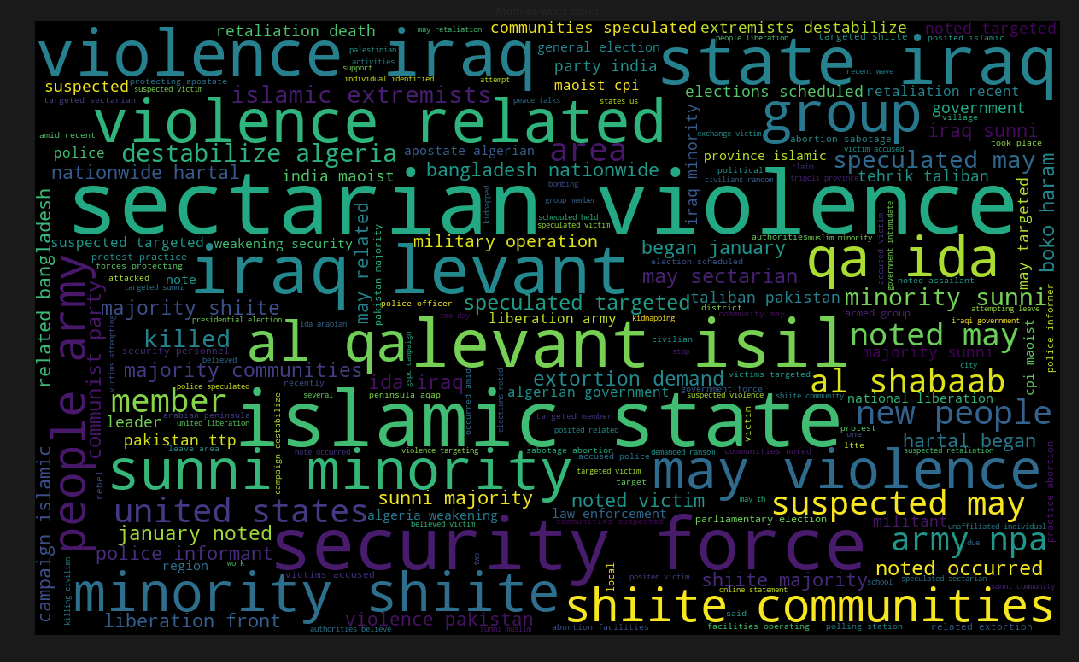

In [87]:
plt.figure(facecolor='k',figsize=(16,9))
plt.imshow(motive_wordcloud)
plt.axis('off')
plt.title('Motives word cloud')
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Attack type')

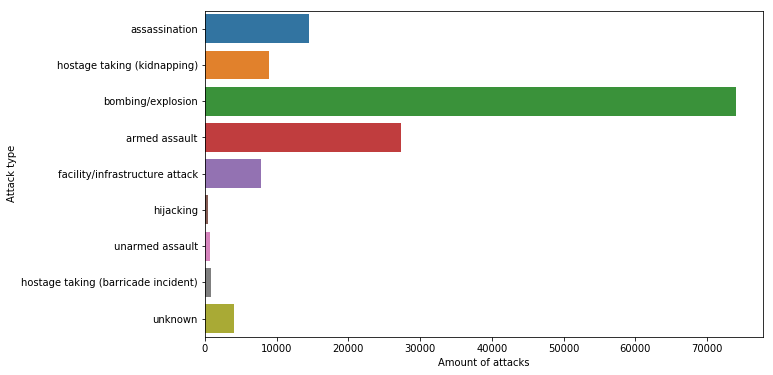

In [14]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y="attacktype1_txt", data=mydata)
ax.set_xlabel("Amount of attacks")
ax.set_ylabel("Attack type")

Text(0, 0.5, 'weapon type')

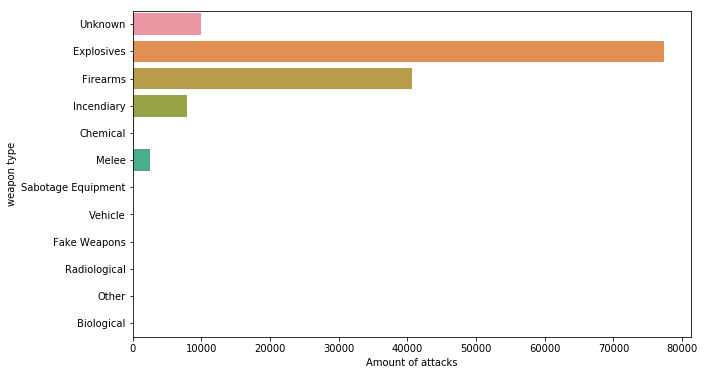

In [13]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y="weaptype1_txt", data=mydata)
ax.set_xlabel("Amount of attacks")
ax.set_ylabel("weapon type")

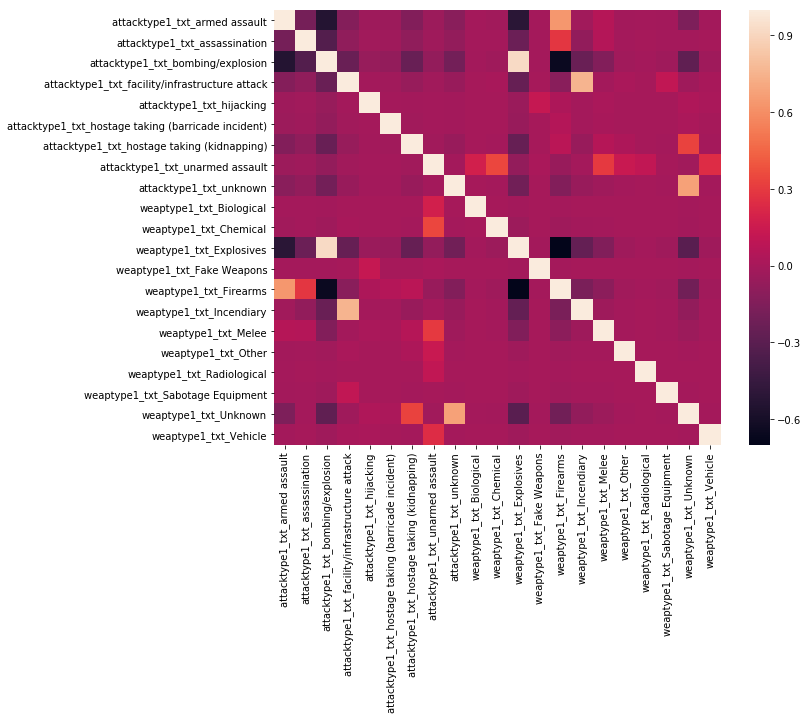

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.get_dummies(mydata[['attacktype1_txt', 'weaptype1_txt']]).corr())
plt.show()

Text(0, 0.5, 'number incedent')

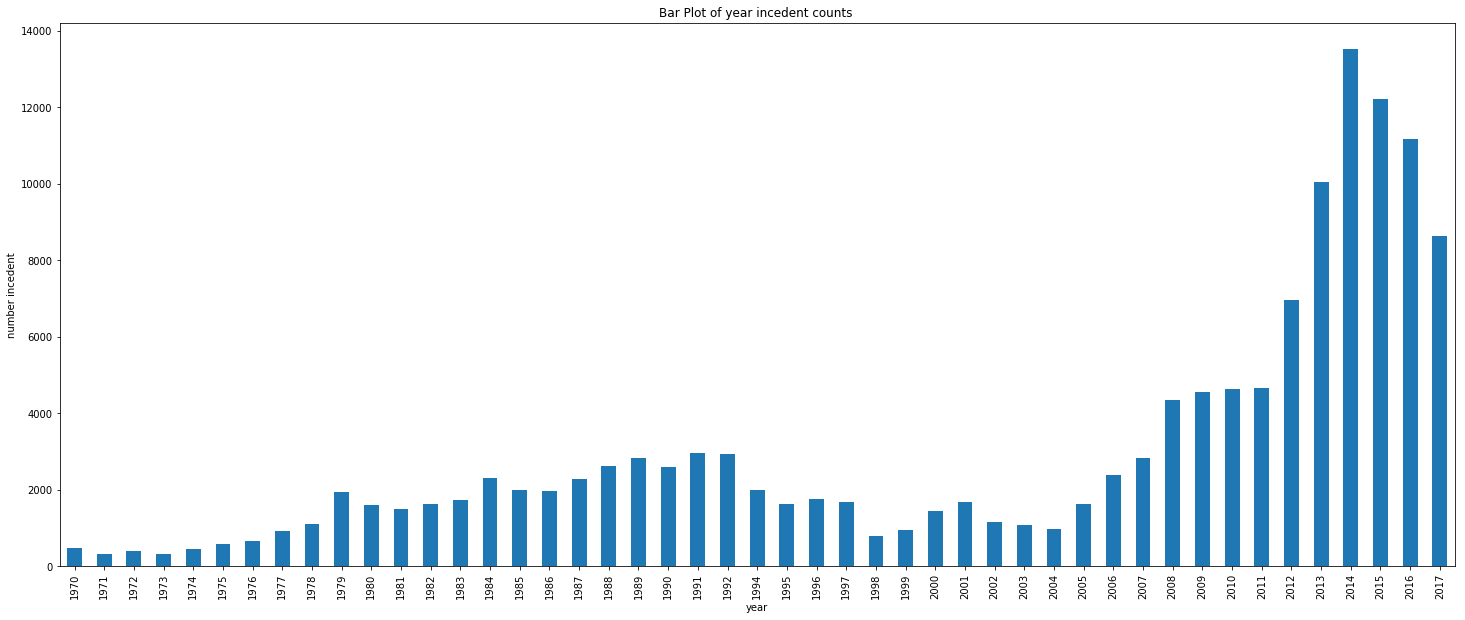

In [15]:
#Bar plot (for discrte/ categoral  data)
counts = mydata['iyear'].value_counts(sort= False)
fig = plt.figure(figsize=(25,10))
ax =fig.gca()
counts[0:].plot.bar(ax = ax)
ax.set_title('Bar Plot of year incedent counts ')
ax.set_xlabel('year')
ax.set_ylabel('number incedent')

Text(0, 0.5, 'number incedent')

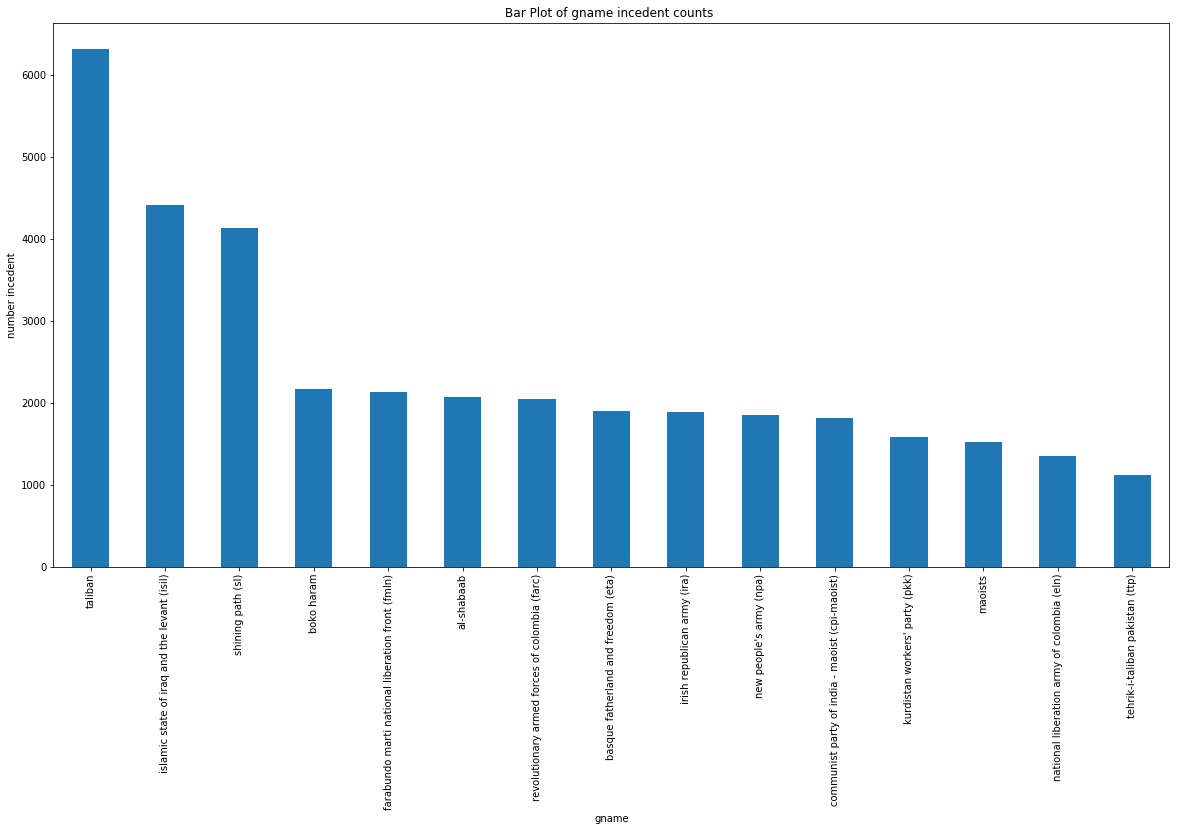

In [16]:
#Bar plot
mydatag = mydata[mydata.gname != 'unknown']
counts = mydatag['gname'].value_counts().nlargest(15)
fig = plt.figure(figsize=(20,10))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of gname incedent counts ')
ax.set_xlabel('gname')
ax.set_ylabel('number incedent')

In [17]:
counts

taliban                                             6314
islamic state of iraq and the levant (isil)         4409
shining path (sl)                                   4138
boko haram                                          2166
farabundo marti national liberation front (fmln)    2129
al-shabaab                                          2070
revolutionary armed forces of colombia (farc)       2047
basque fatherland and freedom (eta)                 1905
irish republican army (ira)                         1884
new people's army (npa)                             1856
communist party of india - maoist (cpi-maoist)      1816
kurdistan workers' party (pkk)                      1583
maoists                                             1521
national liberation army of colombia (eln)          1356
tehrik-i-taliban pakistan (ttp)                     1117
Name: gname, dtype: int64

Text(0, 0.5, 'number incedent')

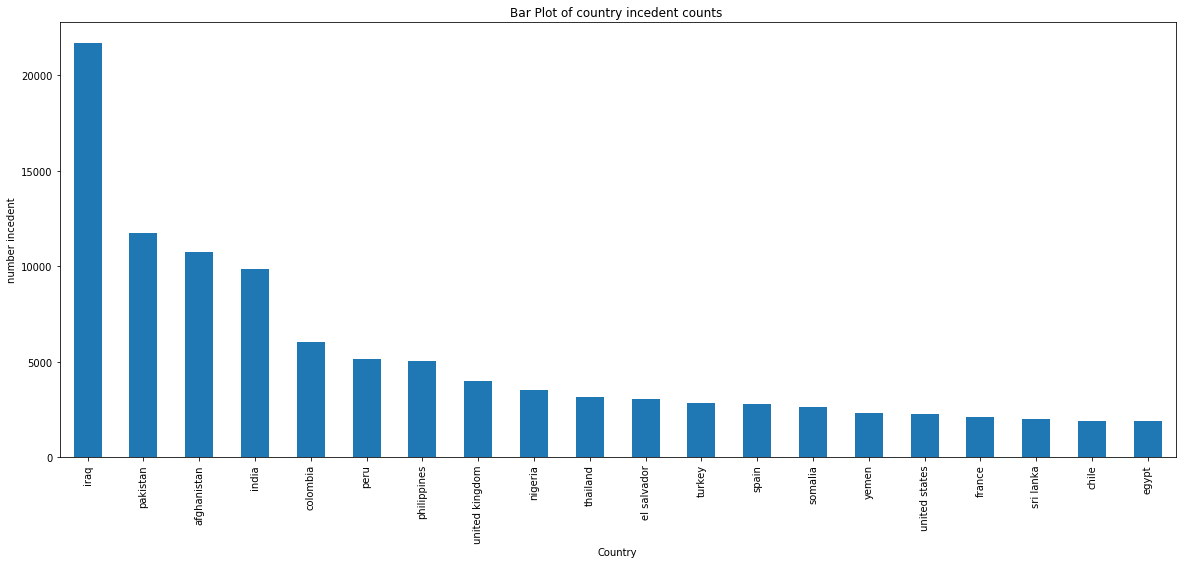

In [18]:
#Bar plot
counts = mydata['country_txt'].value_counts()
fig = plt.figure(figsize=(20,8))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of country incedent counts ')
ax.set_xlabel('Country')
ax.set_ylabel('number incedent')

Text(0, 0.5, 'number incedent')

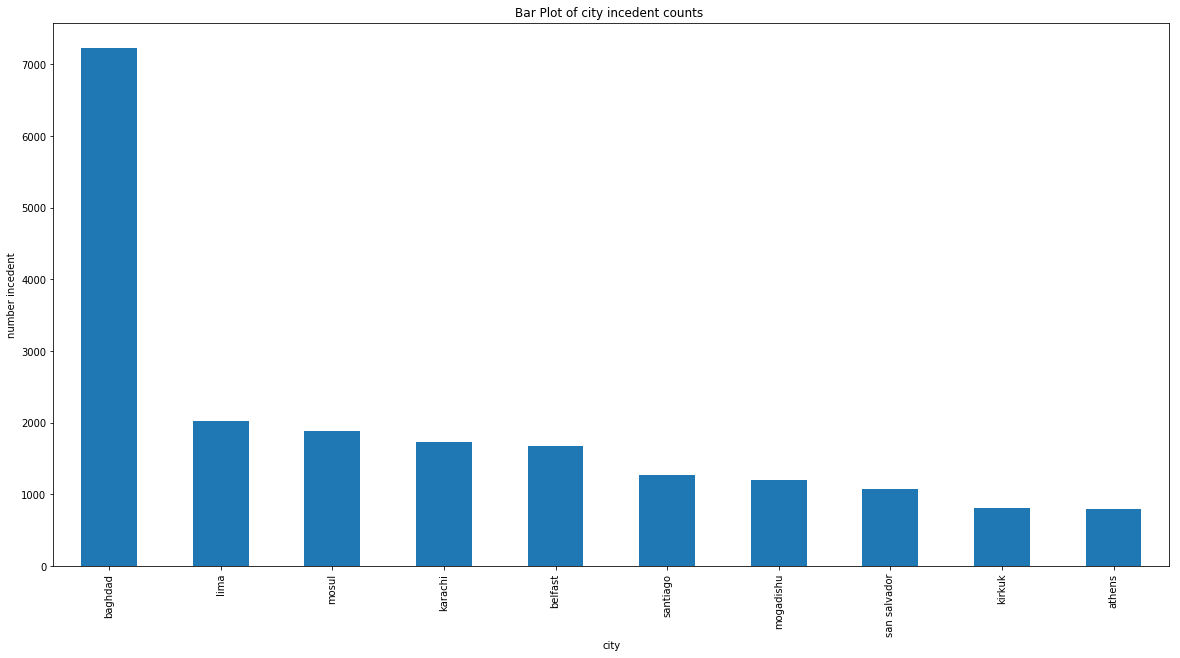

In [20]:
mydatag = mydata[mydata.city != 'unknown']
counts = mydatag['city'].value_counts().nlargest(10)
fig = plt.figure(figsize=(20,10))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of city incedent counts ')
ax.set_xlabel('city')
ax.set_ylabel('number incedent')

In [21]:
# which country has top attcks pe per year
d = pd.DataFrame({'count' : mydata.groupby(['iyear' ,'country_txt']).size()}).reset_index()
max = d.iloc[d.groupby(['iyear']).apply(lambda x: x['count'].idxmax())]
max = pd.DataFrame(max)
max = pd.DataFrame(max.sort_values(by=['iyear']))

In [22]:
max

,iyear,country_txt,count
28,1970,united states,348
53,1971,united states,193
92,1972,united kingdom,161
128,1973,united kingdom,114
170,1974,united kingdom,150
210,1975,united kingdom,148
259,1976,united kingdom,140
287,1977,italy,218
340,1978,italy,185
386,1979,el salvador,248


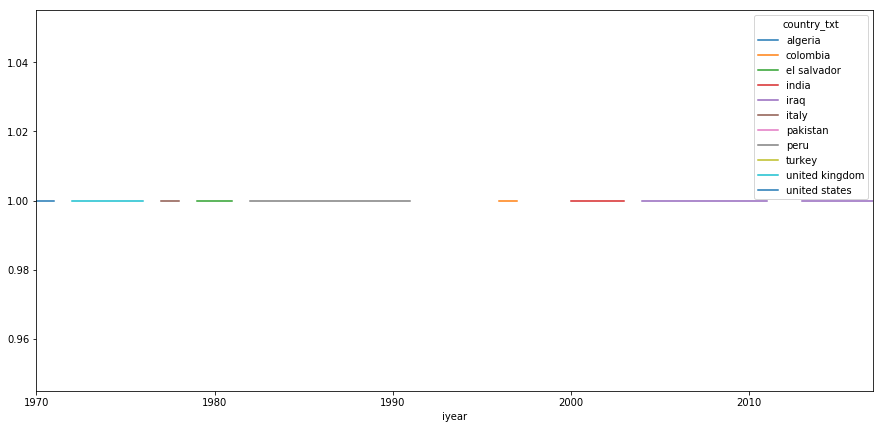

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
max.groupby(['iyear','country_txt']).count()['count'].unstack().plot(ax=ax)


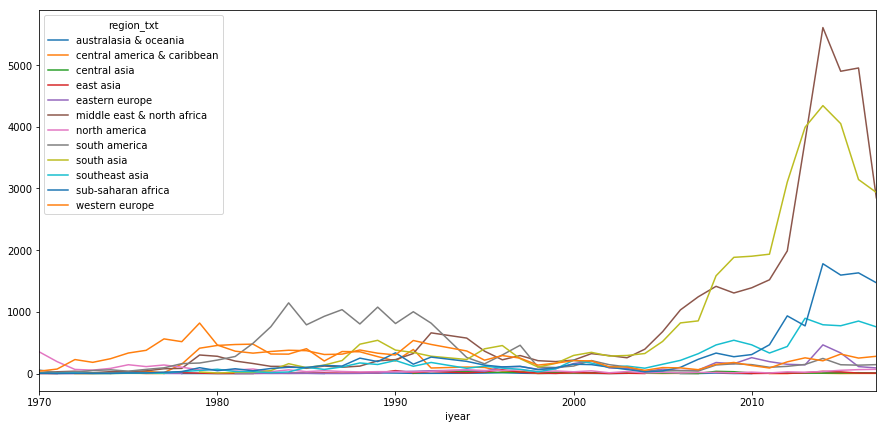

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby(['iyear','region_txt']).count()['success'].unstack().plot(ax=ax)

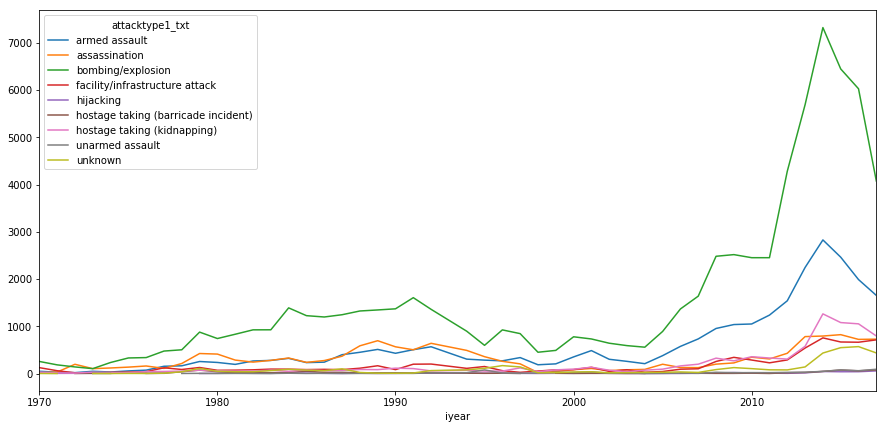

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby(['iyear','attacktype1_txt']).count()['success'].unstack().plot(ax=ax)

(1970, 2017)

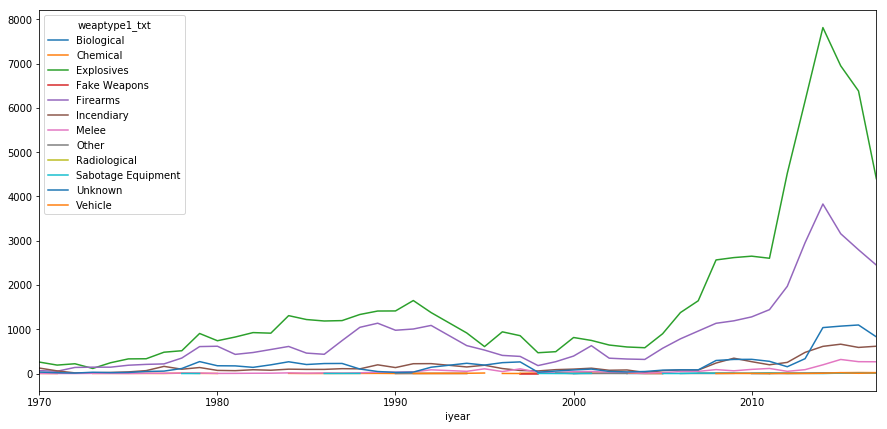

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby(['iyear','weaptype1_txt']).count()['success'].unstack().plot(ax=ax)
ax.set_xlim(1970 , 2017)

Text(0, 0.5, 'nkill')

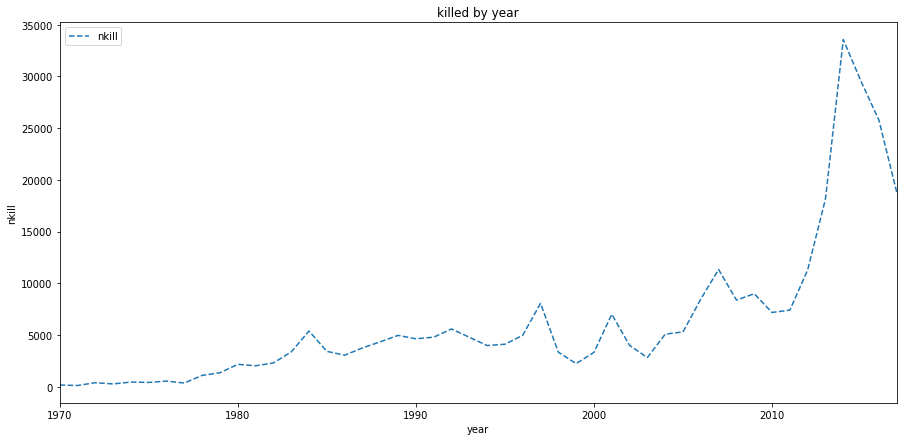

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('iyear', as_index=False)['nkill'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='killed by year')
ax.set_xlabel("year")
ax.set_ylabel("nkill")

Text(0, 0.5, 'nwound')

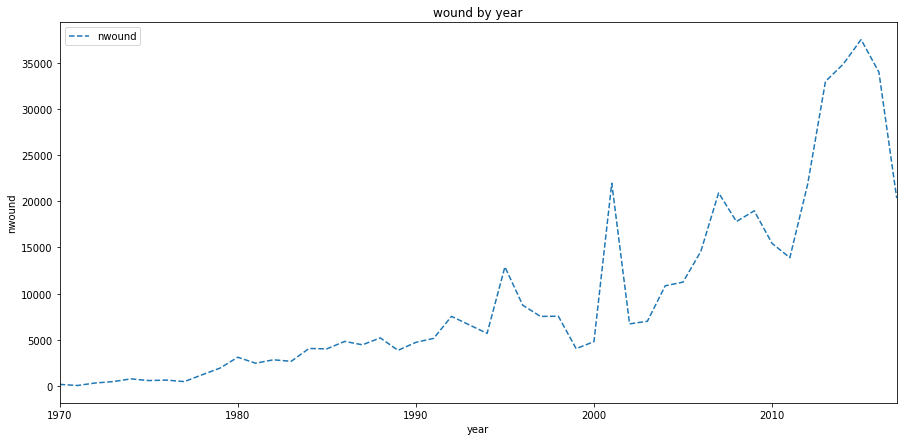

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('iyear', as_index=False)['nwound'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='wound by year')
ax.set_xlabel("year")
ax.set_ylabel("nwound")

Text(0, 0.5, 'nkill / nwound')

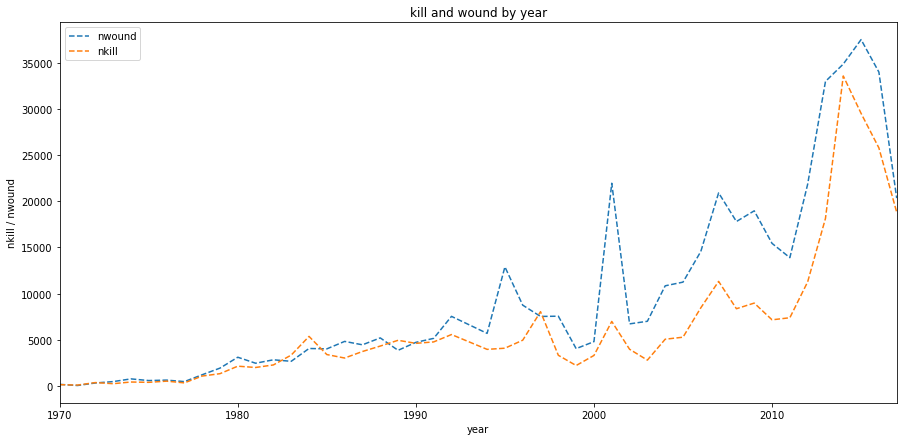

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('iyear', as_index=False)['nwound'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='kill and wound by year')
mydata.groupby('iyear', as_index=False)['nkill'].sum().plot.line(ax = ax , x='iyear' , style ='--' )
                                                                 
ax.set_xlabel("year")
ax.set_ylabel("nkill / nwound")

Text(0, 0.5, 'suicide')

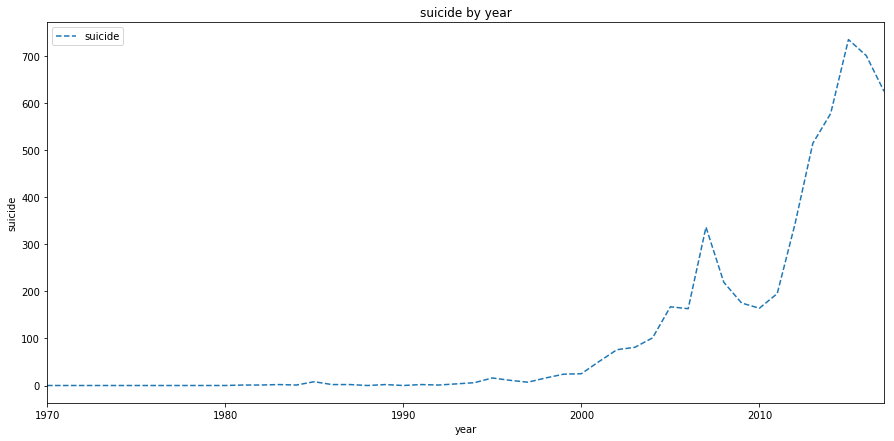

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('iyear', as_index=False)['suicide'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='suicide by year')
ax.set_xlabel("year")
ax.set_ylabel('suicide')

In [56]:
mydatatemp = mydata
mydatatemp['ncasualties'] = mydatatemp['nkill'] + mydatatemp['nwound']

Text(0, 0.5, 'ncasualties')

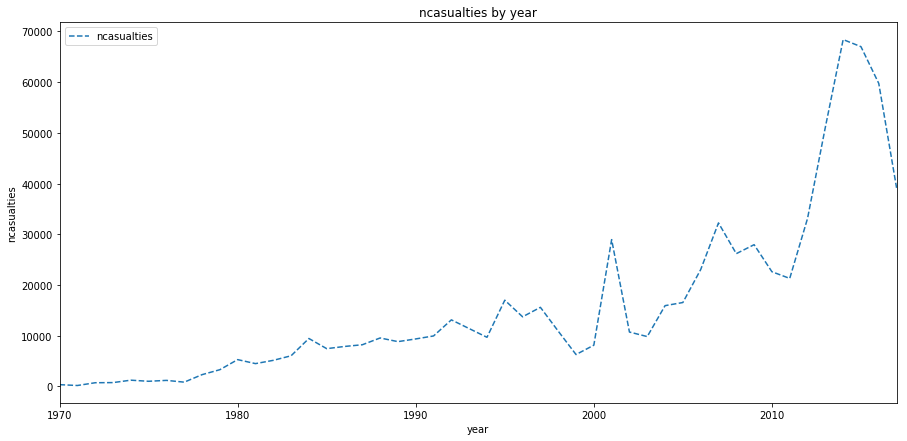

In [57]:
fig, ax = plt.subplots(figsize=(15,7))
mydatatemp.groupby('iyear', as_index=False)['ncasualties'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='ncasualties by year')
ax.set_xlabel("year")
ax.set_ylabel('ncasualties')

In [34]:
mydata2001=mydata[mydata['iyear']==2001]
mydata2001.sort_values(by=['ncasualties'] , ascending=False).head(1)

,eventid,iyear,imonth,iday,extended,summary,crit1,crit2,crit3,doubtterr,...,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,scite3,dbsource,ncasualties
73127,2.001090e+11,2001,9,11,0,09/11/2001: this was one of four related attac...,1,1,1,0.0,...,0.0,0,1,0,1,"United States Government, The 9/11 Commission ...","Lindsay Kines, United States on high alert af...","Joe Frolick, Hijackers Ram Two Airliners Into...",CETIS,9574


In [37]:
mydata2014=mydata[mydata['iyear']==2014]
mydata2014.sort_values(by=['ncasualties'] , ascending=False).head(5)

,eventid,iyear,imonth,iday,extended,summary,crit1,crit2,crit3,doubtterr,...,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,scite3,dbsource,ncasualties
136283,2.014080e+11,2014,8,3,1,08/03/2014: assailants attacked yizidi civilia...,1,1,1,0.0,...,0.0,0,1,0,1,"""Freed From ISIS, Yazidi Women Return in 'Seve...","""Dozens of Yazidi women 'sold into marriage' b...","""WATCH: Yazidi sisters reunite after three yea...",START Primary Collection,953
130420,2.014040e+11,2014,4,15,0,04/15/2014: assailants attacked a mosque being...,1,1,1,0.0,...,0.0,0,1,0,1,"""UN confirms hundreds slaughtered in S.Sudan a...","""S.Sudan Rebels Slaughter 'Hundreds' In Ethnic...","""UN Reveals 353 Killed in South Sudan Attacks,...",START Primary Collection,687
133225,2.014060e+11,2014,6,10,0,06/10/2014: assailants stormed badush prison i...,1,1,1,0.0,...,NaN,0,1,0,1,"""Jihadists seize Iraq's Nineveh province,"" Age...","""Rebels seize control of Iraq's Nineveh,"" Al J...","""UN condemns mass executions by Islami...",START Primary Collection,670
136561,2.014080e+11,2014,8,15,1,08/15/2014: assailants attacked yizidi civilia...,1,1,1,0.0,...,0.0,0,1,0,1,"""Freed From ISIS, Yazidi Women Return in 'Seve...","""ISIS strikes Iraq village, kills Yazidis, off...","""Islamic State group kills 80 men,"" Himalayan ...",START Primary Collection,400
140977,2.014110e+11,2014,11,28,0,11/28/2014: two suicide bombers and a roadside...,1,1,1,0.0,...,NaN,0,0,0,0,"""Nigeria: Kano mosque blasts death toll above ...","""Nigerian mosque attack death toll climbs ...","""At Least 120 Dead In Nigeria Mosque Suicide A...",START Primary Collection,392


In [55]:
mydata2015=mydata[mydata['iyear']==2015]
mydata2015.sort_values(by=['ncasualties'] , ascending=False).head(5)

,eventid,iyear,imonth,iday,extended,summary,crit1,crit2,crit3,doubtterr,...,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,scite3,dbsource,ncasualties
153580,2.015090e+11,2015,9,28,1,"09/28/2015: assailants raided kunduz city, afg...",1,1,1,0.0,...,NaN,0,0,0,0,"""Taliban expands fight beyond Afghanistan's Ku...","""Taliban attack on Afghan city of Kunduz lasts...","""Afghanistan: Seventy Civilians Killed, 180 Wo...",START Primary Collection,536
151527,2.015080e+11,2015,8,7,0,08/07/2015: a suicide bomber detonated an expl...,1,1,1,0.0,...,NaN,0,0,0,0,"""Taliban rejects involvement in Kabul truck bo...","""Pakistan's ISI behind deadly attacks in Kabul...","""3rd explosion rocks Kabul,"" Xinhua News Agenc...",START Primary Collection,416
149783,2.015060e+11,2015,6,25,0,06/25/2015: assailants detonated an explosives...,1,1,1,0.0,...,NaN,0,1,0,1,"""Kurds oust IS from Syria's Kobane as civilian...","""Kurds secure Syria's Kobani after Islamic Sta...","""IS 'kills 120 civilians' in Kobane,"" BBC, Jun...",START Primary Collection,375
154029,2.015100e+11,2015,10,10,0,10/10/2015: two suicide bombers detonated at a...,1,1,1,0.0,...,NaN,0,1,0,1,"""Turkey's Erdogan sees Syrian intelligence, Is...","""Death toll up to 102 in Ankara train station ...","""Turkey declares IS responsible for Ankara dou...",START Primary Collection,350
155389,2.015110e+11,2015,11,13,0,11/13/2015: three suicide bombers opened fire ...,1,1,1,0.0,...,0.0,1,1,1,1,"""For Survivors of Paris Attacks, Mental Scars ...","""In Memoriam: Paris Terror Attacks,"" CNN, Nove...","""Stories of those who died in the Paris attack...",START Primary Collection,310


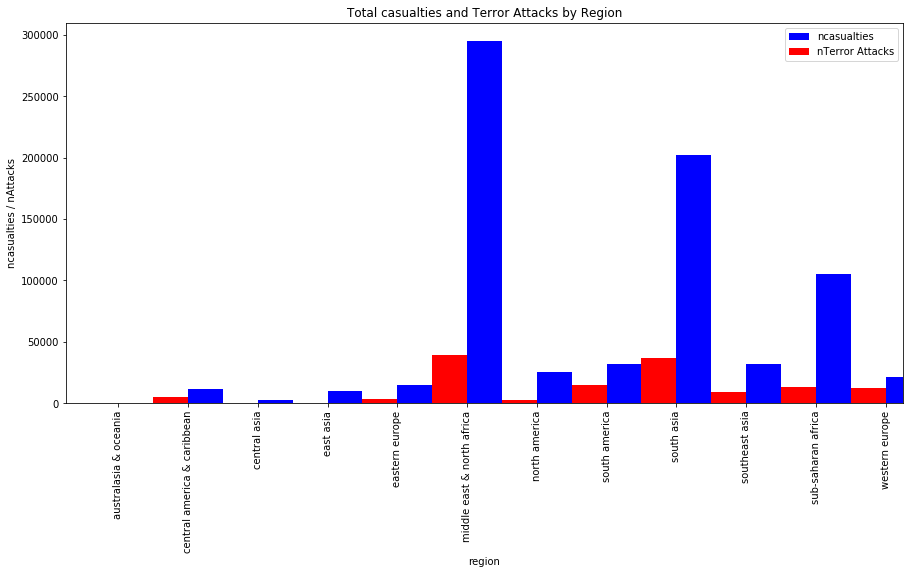

In [63]:
fig, ax = plt.subplots(figsize=(15,7))
mydatatemp.groupby('region_txt', as_index=False)['ncasualties'].sum().plot(kind='bar', color='b', ax=ax, position= 0)
                                                           
mydatatemp.groupby('region_txt')['region_txt'].count().plot(kind='bar', color='r', ax=ax, position= 1 ,
                                                            title = "Total casualties and Terror Attacks by Region")


ax.set_xlabel("region")
ax.set_ylabel("ncasualties / nAttacks")
ax.legend(['ncasualties', 'nTerror Attacks'])

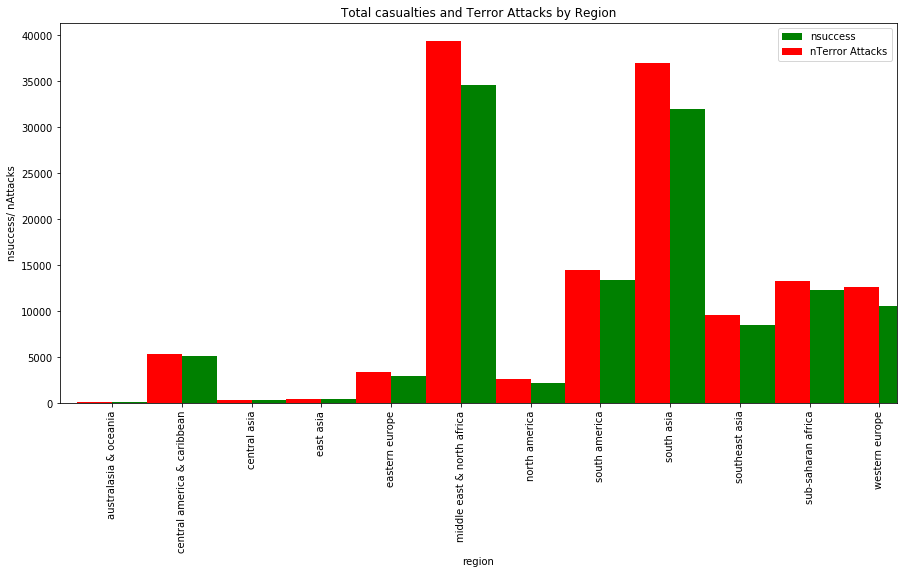

In [62]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('region_txt', as_index=False)['success'].sum().plot(kind='bar', color='g', ax=ax, position= 0)
                                                           
mydatatemp.groupby('region_txt')['region_txt'].count().plot(kind='bar', color='r', ax=ax, position =1 ,title = "Total casualties and Terror Attacks by Region")  

ax.set_xlabel("region")
ax.set_ylabel("nsuccess/ nAttacks")
ax.legend(['nsuccess', 'nTerror Attacks'])

Text(0, 0.5, 'number incedent')

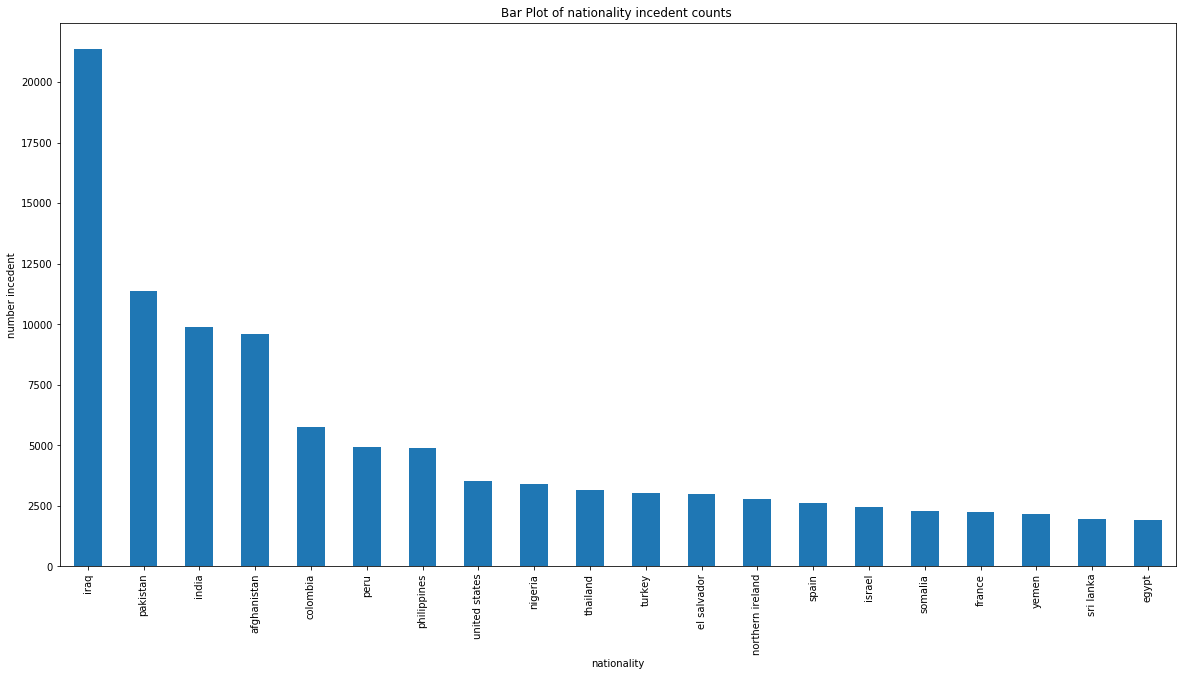

In [41]:
counts = mydata.groupby('natlty1_txt')['natlty1_txt'].count().nlargest(20)
fig = plt.figure(figsize=(20,10))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of nationality incedent counts ')
ax.set_xlabel('nationality')
ax.set_ylabel('number incedent')

In [42]:
target_nationality = mydata.groupby('natlty1_txt')['natlty1_txt'].count().nlargest(20)
target_nationality

natlty1_txt
iraq                21374
pakistan            11383
india                9896
afghanistan          9608
colombia             5747
peru                 4934
philippines          4886
united states        3529
nigeria              3389
thailand             3144
turkey               3036
el salvador          2983
northern ireland     2786
spain                2616
israel               2462
somalia              2303
france               2258
yemen                2162
sri lanka            1972
egypt                1927
Name: natlty1_txt, dtype: int64

Text(0, 0.5, 'number incedent')

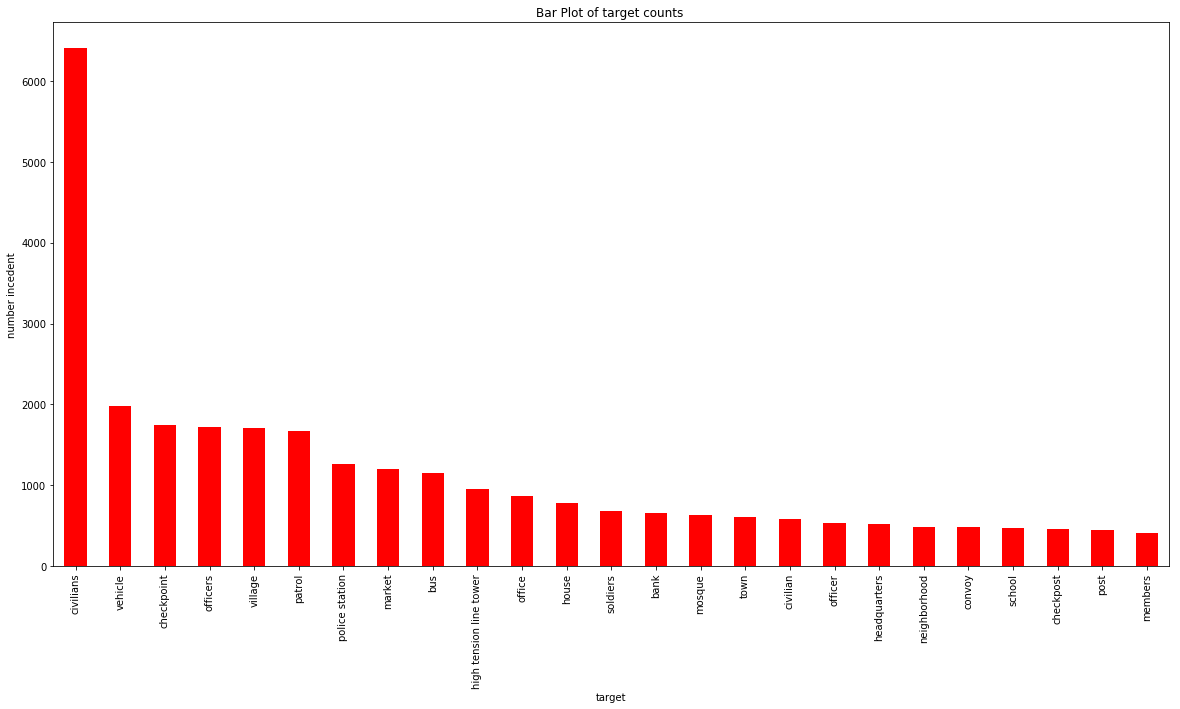

In [43]:
mydatag = mydata[mydata.target1 != 'unknown']
counts = mydatag['target1'].value_counts().nlargest(25)
fig = plt.figure(figsize=(20,10))
ax =fig.gca()
counts.plot.bar(ax = ax , color='r')
ax.set_title('Bar Plot of target counts ')
ax.set_xlabel('target')
ax.set_ylabel('number incedent')

In [47]:
target = mydatag['target1'].value_counts().nlargest(25)
target

civilians                  6401
vehicle                    1979
checkpoint                 1740
officers                   1723
village                    1712
patrol                     1672
unknown                    1306
police station             1267
market                     1197
bus                        1145
high tension line tower     959
office                      867
house                       778
soldiers                    686
bank                        659
mosque                      632
town                        611
civilian                    588
officer                     534
headquarters                525
neighborhood                487
convoy                      480
school                      471
checkpost                   456
post                        449
Name: target1, dtype: int64

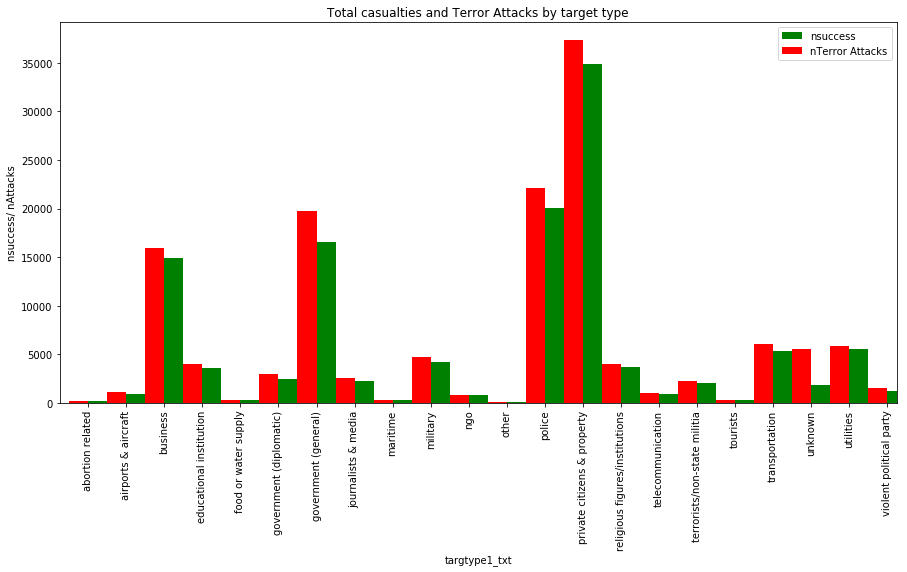

In [61]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('targtype1_txt', as_index=False)['success'].sum().plot(kind='bar', color='g', ax=ax, position= 0)
                                                           
mydatatemp.groupby('targtype1_txt')['targtype1_txt'].count().plot(kind='bar', color='r', ax=ax, position =1,title = "Total casualties and Terror Attacks by target type")  

ax.set_xlabel("targtype1_txt")
ax.set_ylabel("nsuccess/ nAttacks")
ax.legend(['nsuccess', 'nTerror Attacks'])

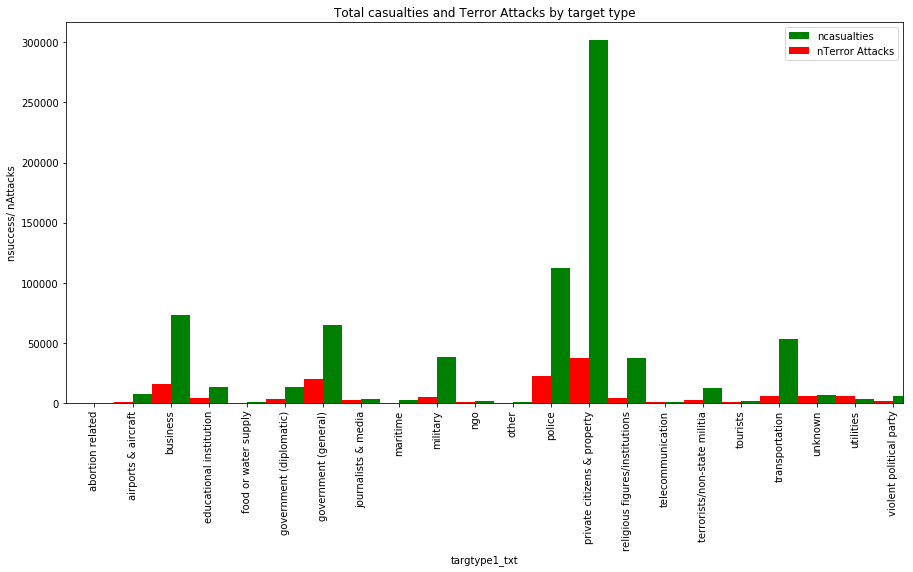

In [60]:
fig, ax = plt.subplots(figsize=(15,7))
mydatatemp.groupby('targtype1_txt', as_index=False)['ncasualties'].sum().plot(kind='bar', color='g', ax=ax, position= 0)
                                                           
mydatatemp.groupby('targtype1_txt')['targtype1_txt'].count().plot(kind='bar', color='r', ax=ax, position =1 ,title = "Total casualties and Terror Attacks by target type")  

ax.set_xlabel("targtype1_txt")
ax.set_ylabel("nsuccess/ nAttacks")
ax.legend(['ncasualties', 'nTerror Attacks'])

## Dimensionality Reduction

remove attributs with too many missing values
remove attributis with zero or very low varince
remove one of the attribits with high correlations with other - prefer the one with more missing values or lower varince
Feature selection(decide on the importance of the attribute using statstical measures like information gain or Geni index) (Forward selection and backward elemination) 
Feature extraction (reduce dimensions by transformation PCA princibal complnet anaylsis or Linear dircrminate analysis)


##### Remove low or No Varince
since crit1, crit2, crit3 and doubtterr is set to one value after filtering i.e varince = 0 for all of them we can elminate the attributes since no value added and no future use 

In [108]:
mydata['crit1'].describe()

count    138879.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit1, dtype: float64

In [109]:
mydata['crit2'].describe()

count    138879.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit2, dtype: float64

In [110]:
mydata['crit3'].describe()

count    138879.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit3, dtype: float64

In [111]:
mydata['crit1'].describe()

count    138879.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit1, dtype: float64

In [112]:
mydata['doubtterr'].describe()

count    138879.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: doubtterr, dtype: float64

In [134]:
list1 = ['crit1' , 'crit2' , 'crit3' , 'doubtterr']

In [135]:
mydata.shape

(138879, 66)

In [136]:
mydata = mydata.drop(list1,axis=1)

In [137]:
mydata.shape

(138879, 62)

In [266]:
#mydata

In [138]:
# remove attributes USA spesefic which will not be used in this study
# 'nkillus' , 'nwoundus' , 'nhostkidus' , 'ransomamtus' , 'ransompaidus'
list1 = ['nkillus' , 'nwoundus' ]

In [139]:
mydata = mydata.drop(list1,axis=1)

In [140]:
mydata.shape

(138879, 60)

In [141]:
# remove the additional infromation attributes which will not add value in this study
#'addnotes' , 'INT_LOG' , 'INT_IDEO' , 'INT_MISC', 'INT_ANY' , 'scite1' , 'scite2', 'scite3' ,'dbsource'
list1 = ['INT_LOG' , 'INT_IDEO' , 'INT_MISC', 'INT_ANY' , 'scite1' , 'scite2', 'scite3' ,'dbsource']


In [142]:
mydata = mydata.drop(list1,axis=1)

In [143]:
mydata.shape

(138879, 52)

In [273]:
list_col = mydata.columns

In [274]:
list_col

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'summary', 'multiple',
       'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city',
       'vicinity', 'location', 'latitude', 'longitude', 'specificity',
       'attacktype1', 'attacktype1_txt', 'success', 'suicide', 'weaptype1',
       'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'guncertain1',
       'individual', 'nperps', 'nperpcap', 'claimed', 'motive', 'nkill',
       'nkillter', 'nwound', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propcomment', 'ishostkid', 'ransom'],
      dtype='object')

In [275]:
#Remove highly corrleated attribuite and Duplicates (for categorial keep the txt attribuites only )
#for example remove country and keep country_txt 

In [407]:
lb = LabelEncoder()
mydata['country_txt'] = lb.fit_transform(mydata['country_txt'])
mydata['country'].corr(mydata['country_txt'])

0.7215509592526527

In [144]:
# list to drop
list2 = ['eventid','summary','country' , 'region' ,'location','specificity','attacktype1', 'weaptype1' , 'weapsubtype1' , 'weapsubtype1_txt', 
         'weapdetail','targtype1','targsubtype1', 'targsubtype1_txt','natlty1','guncertain1' , 'individual' , 
         'propextent', 'propextent_txt', 'propcomment' ,'ransom' ,'motive','corp1']

In [145]:
mydata = mydata.drop(list2,axis=1)

In [146]:
list_col = mydata.columns
list_col

Index(['iyear', 'imonth', 'iday', 'extended', 'multiple', 'country_txt',
       'region_txt', 'provstate', 'city', 'vicinity', 'latitude', 'longitude',
       'attacktype1_txt', 'success', 'suicide', 'weaptype1_txt',
       'targtype1_txt', 'target1', 'natlty1_txt', 'gname', 'nperps',
       'nperpcap', 'claimed', 'nkill', 'nkillter', 'nwound', 'nwoundte',
       'property', 'ishostkid'],
      dtype='object')

In [147]:
mydata.shape

(138879, 29)

In [157]:
# Save the clean dataframe
mydata.to_csv('../code/mydata_clean.csv' , index= False)

In [2]:
#Here start to  Read the clean dataframe
mydata = pd.read_csv('../code/mydata_clean.csv', encoding='ISO-8859-1')

In [3]:
mydata.shape

(138879, 29)

In [191]:
mydata.head()

,iyear,imonth,iday,extended,multiple,country_txt,region_txt,provstate,city,vicinity,...,gname,nperps,nperpcap,claimed,nkill,nkillter,nwound,nwoundte,property,ishostkid
0,1970,7,2,0,0.0,dominican republic,central america & caribbean,unknown,santo domingo,0,...,mano-d,NaN,NaN,NaN,1,NaN,0,NaN,0,0.0
1,1970,0,0,0,0.0,mexico,north america,federal,mexico city,0,...,23rd of september communist league,7.0,NaN,NaN,0,NaN,0,NaN,0,1.0
2,1970,1,0,0,0.0,philippines,southeast asia,tarlac,unknown,0,...,unknown,NaN,NaN,NaN,1,NaN,0,NaN,0,0.0
3,1970,1,0,0,0.0,greece,western europe,attica,athens,0,...,unknown,NaN,NaN,NaN,0,NaN,0,NaN,1,0.0
4,1970,1,1,0,0.0,united states,north america,illinois,cairo,0,...,black nationalists,-99.0,-99.0,0.0,0,0.0,0,0.0,1,0.0


### feature selction / importance

In [413]:
#add cols
#mydata['ncasualties'] = mydata['nkill'] + mydata['nwound']
#mydata['has_casualties'] = mydata['ncasualties'].apply(lambda x: 0 if x == 0 else 1)

In [414]:
mydata.shape

(138879, 31)

In [289]:
mydata['iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [148]:
mydata['imonth'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [149]:
mydata['iday'].unique()

array([ 2,  0,  1,  3,  9, 10, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26, 27,
       30,  4,  6,  8, 16, 17, 18, 23, 24,  5, 11, 29, 31, 28,  7],
      dtype=int64)

In [151]:
mydata['extended'].unique()

array([0, 1], dtype=int64)

In [152]:
mydata['multiple'].unique()

array([ 0.,  1., nan])

In [153]:
mydata['country_txt'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece',
       'United States', 'Uruguay', 'East Germany (GDR)', 'Guatemala',
       'Venezuela', 'West Germany (FRG)', 'Switzerland', 'Italy', 'Spain',
       'Brazil', 'Ethiopia', 'Egypt', 'Argentina', 'Lebanon', 'Japan',
       'Ireland', 'Jordan', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Bolivia', 'Nicaragua', 'Belgium', 'Netherlands',
       'Canada', 'Australia', 'Pakistan', 'Zambia', 'Sweden',
       'South Yemen', 'Cambodia', 'Israel', 'Poland', 'Taiwan', 'Panama',
       'Kuwait', 'Austria', 'Czechoslovakia', 'India', 'France',
       'South Vietnam', 'Colombia', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Cyprus', 'Myanmar',
       'Afghanistan', 'Morocco', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'Malaysia', 'Singapore', 'Jamaica',
       'Chad', 'North Yemen', 'Andorra', 'Syria', 'South Korea',

In [154]:
mydata['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa', 'East Asia',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [155]:
mydata['provstate'].unique()

array([nan, 'Federal', 'Tarlac', ..., 'Carlow', 'Western Lakes',
       'Vidzeme'], dtype=object)

In [47]:
mydata['city'].unique()

array(['santo domingo', 'mexico city', 'unknown', ..., 'spinetoli',
       'hungrum', 'kubentog'], dtype=object)

In [157]:
mydata['vicinity'].unique()

array([ 0,  1, -9], dtype=int64)

In [159]:
mydata['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Armed Assault',
       'Facility/Infrastructure Attack', 'Hijacking', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)', 'Unknown'], dtype=object)

In [164]:
mydata['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Military',
       'Government (General)', 'Educational Institution', 'Business',
       'Violent Political Party', 'Unknown', 'Transportation',
       'Utilities', 'Airports & Aircraft',
       'Religious Figures/Institutions', 'Telecommunication',
       'Food or Water Supply', 'NGO', 'Terrorists/Non-State Militia',
       'Other', 'Tourists', 'Maritime', 'Abortion Related'], dtype=object)

In [166]:
mydata['claimed'].unique()

array([nan,  0.,  1., -9.])

In [171]:
mydata['natlty1_txt'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Ethiopia', 'Spain', 'Japan',
       'International', 'Egypt', 'Paraguay', 'Soviet Union', 'Ireland',
       'Philippines', 'China', 'West Bank and Gaza Strip', 'Argentina',
       'Multinational', 'Northern Ireland', 'Haiti', 'South Africa',
       'Nicaragua', 'Brazil', 'Yugoslavia', 'Italy', 'Rhodesia',
       'Portugal', 'Jordan', 'Ivory Coast', 'Iran', 'Canada', 'Poland',
       'Sweden', 'Turkey', nan, 'Cuba', 'France', 'Malawi',
       'Democratic Republic of the Congo', 'Netherlands', 'Chile',
       'Hong Kong', 'Colombia', 'India', 'Greece', 'New Zealand',
       'Senegal', 'Algeria', 'Peru', 'Czechoslovakia', 'Saudi Arabia',
       'Mexico', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'El Salvador', 'Guatemala', 'Lebanon', 'North Korea', 'Albania',
       'South Korea', 'Bolivia', 'United Kingdom'

In [33]:
mydata['property'].unique()

array([ 1,  0, -9], dtype=int64)

In [4]:
target_col = 'success' 

In [5]:
feature_cols = [
    'iyear', 'imonth', 'iday', 
    'extended', 'multiple', 
    'country_txt','region_txt', 'provstate', 'city', 'vicinity',
    'latitude', 'longitude',
    'attacktype1_txt', 
    'weaptype1_txt', 
    'targtype1_txt', 'target1',
    'nperps', 'nperpcap', 'nkillter', 'nwoundte', 
    'claimed',  'gname',
    'nkill',  'nwound', 'natlty1_txt',
    'suicide',
    'property', 'ishostkid'
]

In [6]:
lb = LabelEncoder()

In [7]:
mydata['country_txt'] = lb.fit_transform(mydata['country_txt'])
mydata['region_txt'] = lb.fit_transform(mydata['region_txt'])
mydata['city'] = lb.fit_transform(mydata['city'])
mydata['provstate'] = lb.fit_transform(mydata['provstate'])
mydata['attacktype1_txt'] = lb.fit_transform(mydata['attacktype1_txt'])
mydata['targtype1_txt'] = lb.fit_transform(mydata['targtype1_txt'])
mydata['weaptype1_txt'] = lb.fit_transform(mydata['weaptype1_txt'])
mydata['natlty1_txt'] = lb.fit_transform(mydata['natlty1_txt'])
mydata['gname'] = lb.fit_transform(mydata['gname'])
mydata['target1'] = lb.fit_transform(mydata['target1'])

In [44]:
mydata['country_txt'].head()

0     46
1    115
2    138
3     67
4    187
Name: country_txt, dtype: int32

#### Features Selections 

In [297]:
#mydata['success'].unique()

In [298]:
#mydata['success'].value_counts()

In [23]:
X = mydata[feature_cols].fillna(0)
y = mydata[target_col]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , shuffle = True)

In [47]:
forest = ExtraTreesClassifier(n_estimators=20, random_state= 1)

In [48]:
forest.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [49]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
fnames = [feature_cols[i] for i in indices]

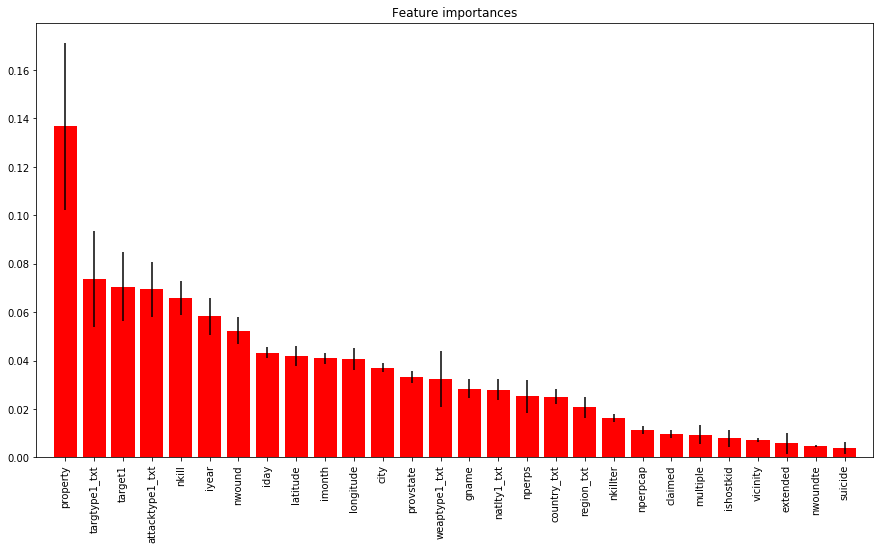

In [50]:
plt.figure(figsize=(15,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), fnames, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
#Dimesnionality Redction based on features selction above

In [8]:
feature_cols = [
    'iyear', 'imonth', 'iday', 
    #'extended', 
    #'multiple', 
    'country_txt','region_txt', 'provstate', 'city', #'vicinity',
    'latitude', 'longitude',
    'attacktype1_txt', 
    'weaptype1_txt', 
    'targtype1_txt', 'target1',
    'nperps', 'nperpcap', 'nkillter', #'nwoundte', 
    'claimed',  'gname',
    'nkill',  'nwound', 'natlty1_txt',
    #'suicide',
    'property', #'ishostkid'
]

## Experimental Desgin

Randamizing, Splitting the data into training and test sets (tranditional or Concept drift in case of time involved)
Treatment for imblance (undersampling the majority class and oversampling the minority class)
Cross validation such as 10 flods 
Bootstrapping resmapling


#### Treatment for imblance 

Class 0: 16309
Class 1: 122570
Proportion: 0.13  : 1


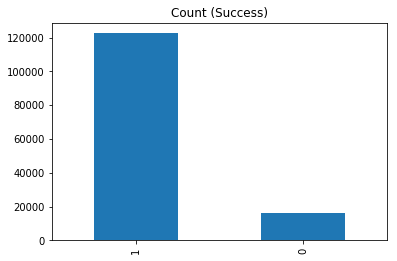

In [204]:
class_count = mydata.success.value_counts()

print('Class 0:', class_count[0])
print('Class 1:', class_count[1])
print('Proportion:', round(class_count[0] / class_count[1], 2), ' : 1')

class_count.plot(kind='bar', title='Count (Success)');


Text(0.5, 1.0, 'Terroist attacks with lesser than 100 killed success =1 is red and = 0 is green')

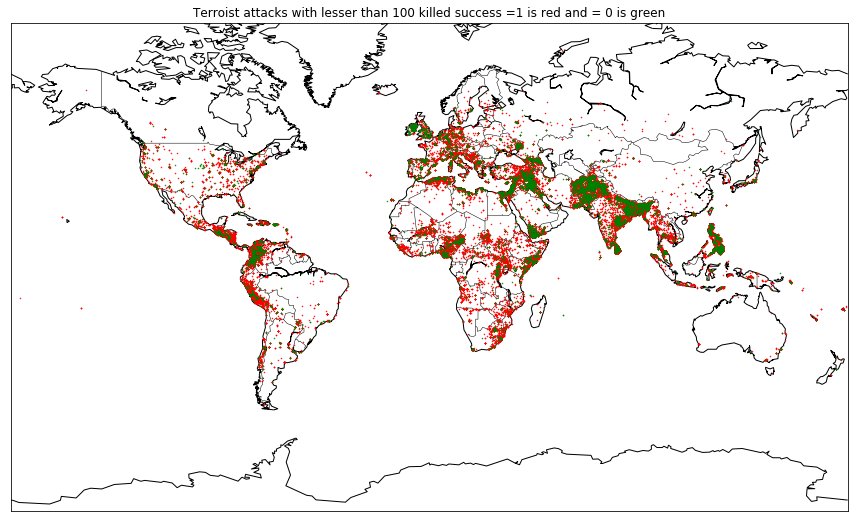

In [64]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(mydata[(mydata['nkill'] <100) & (mydata['success'] == 1)].latitude)
long_100=list(mydata[(mydata['nkill'] <100) & (mydata['success'] == 1)].longitude)

lat_200=list(mydata[(mydata['nkill'] <100) & (mydata['success'] == 0)].latitude)
long_200=list(mydata[(mydata['nkill'] <100) & (mydata['success'] == 0)].longitude)


x_100,y_100=m3(long_100, lat_100)
x_200,y_200=m3(long_200, lat_200)

m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'r')
m3.plot(x_200, y_200,'go',markersize=0.5,color = 'g')


fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks with lesser than 100 killed success =1 is red and = 0 is green")

In [18]:
'''
class_count = mydata.suicide.value_counts()

print('Class 0:', class_count[0])
print('Class 1:', class_count[1])
print('Proportion:', round(class_count[0] / class_count[1], 2), ' : 1')

class_count.plot(kind='bar', title='Count (Suicide)');

'''


"\nclass_count = mydata.suicide.value_counts()\n\nprint('Class 0:', class_count[0])\nprint('Class 1:', class_count[1])\nprint('Proportion:', round(class_count[0] / class_count[1], 2), ' : 1')\n\nclass_count.plot(kind='bar', title='Count (Suicide)');\n\n"

In [9]:
from sklearn.utils import resample

In [10]:
#Up-sample Minority Class
# Separate majority and minority classes
df_majority = mydata[mydata.success ==1]
df_minority = mydata[mydata.success ==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=50000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
mydata = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
mydata.success.value_counts()


1    122570
0     50000
Name: success, dtype: int64

In [11]:
#Down-sample Majority Class
# Separate majority and minority classes
df_majority = mydata[mydata.success ==1]
df_minority = mydata[mydata.success ==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=50000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
mydata = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
mydata.success.value_counts()


1    50000
0    50000
Name: success, dtype: int64

Class 0: 50000
Class 1: 50000
Proportion: 1.0  : 1


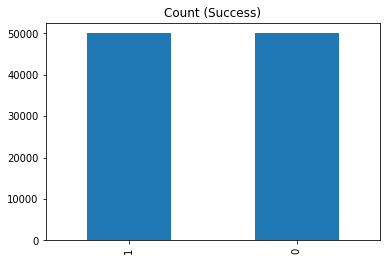

In [55]:
class_count = mydata.success.value_counts()

print('Class 0:', class_count[0])
print('Class 1:', class_count[1])
print('Proportion:', round(class_count[0] / class_count[1], 2), ' : 1')

class_count.plot(kind='bar', title='Count (Success)');

In [209]:
mydata.shape

(100000, 29)

### Model Selection

In [210]:
mydata.shape

(100000, 29)

In [12]:
target_col =  target_col

In [13]:
X = mydata[feature_cols].fillna(0)
y = mydata[target_col]


In [14]:
y.shape

(100000,)

In [15]:
X.shape

(100000, 22)

In [196]:
mytable = pd.DataFrame(columns= ['model_name' ,'model_score'])mytable


#Cross Validation 10 folds define fuction
from sklearn.model_selection import cross_val_score
def cross_val(model , i):
    scores = cross_val_score(model , X, y, cv = 10, scoring = 'accuracy').mean()
    print ('model accuracy = ',scores)
    
    mytable.loc[i ,'model_name'] = (type(model).__name__) 
    mytable.loc[i,'model_score'] = scores 
    
                         
    

In [197]:
#model1 RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)

In [198]:
#Cross Validation 10 folds
cross_val(model , 0)


model accuracy =  0.97499


In [199]:
#model2 Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class='auto')

In [201]:
#Cross Validation 10 folds
cross_val(model , 1)

model accuracy =  0.72267


In [117]:
#model SGD
from sklearn.linear_model import SGDClassifier
model =  SGDClassifier(penalty = 'l1')

In [203]:
#Cross Validation 10 folds
cross_val(model , 2)

model accuracy =  0.5176499999999999


In [204]:
#model Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state= 123)

In [205]:
#Cross Validation 10 folds
cross_val(model , 3)

model accuracy =  0.96038


In [206]:
#model Gaussian Naive-Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [207]:
#Cross Validation 10 folds
cross_val(model , 4)

model accuracy =  0.57867


In [208]:
#model SVC 
from sklearn.svm import LinearSVC
model = LinearSVC(penalty = 'l1' , dual  = False)

In [209]:
#Cross Validation 10 folds
warnings.filterwarnings('ignore')
cross_val(model , 5)

C:\Users\emil\Anaconda3\envs\emil2019\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\emil\Anaconda3\envs\emil2019\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\emil\Anaconda3\envs\emil2019\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\emil\Anaconda3\envs\emil2019\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\emil\Anaconda3\envs\emil2019\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\emil\Anaconda3\envs\emil2019\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of itera

model accuracy =  0.70397


C:\Users\emil\Anaconda3\envs\emil2019\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [210]:
#model KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)

In [211]:
#Cross Validation 10 folds
cross_val(model , 6)

model accuracy =  0.8220500000000002


In [212]:
#Model Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [213]:
#Cross Validation 10 folds
cross_val(model , 7)

model accuracy =  0.8656599999999999


In [229]:
mytable_sort = mytable.sort_values(by='model_score', ascending=False)

In [230]:
mytable_sort

,model_name,model_score
0,RandomForestClassifier,0.97499
3,DecisionTreeClassifier,0.96038
7,GradientBoostingClassifier,0.86566
6,KNeighborsClassifier,0.82205
1,LogisticRegression,0.72267
5,LinearSVC,0.70397
4,GaussianNB,0.57867
2,SGDClassifier,0.51765


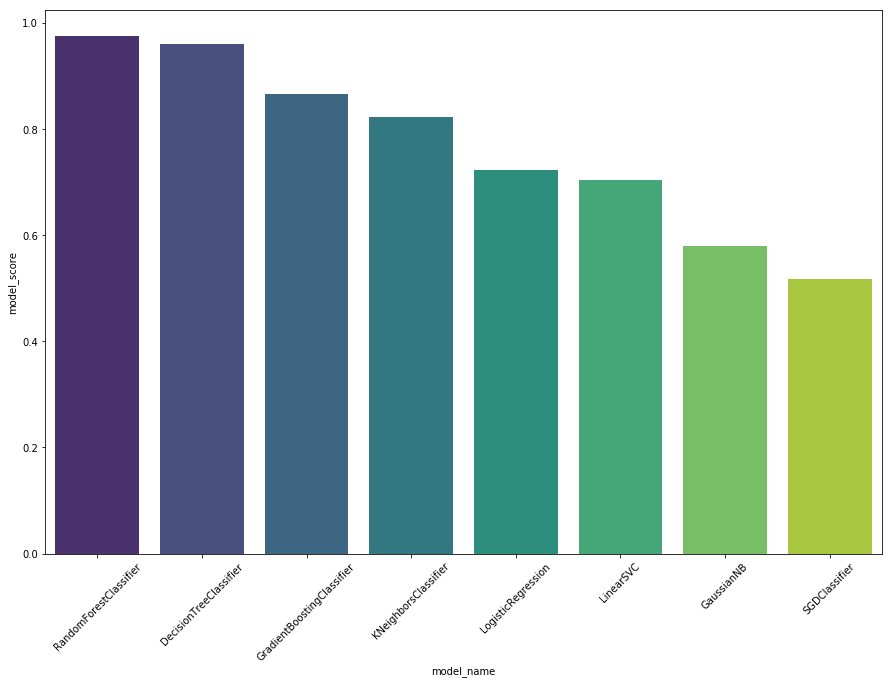

In [233]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 45, ha = 'center')
sns.barplot(mytable_sort.model_name, mytable_sort.model_score , palette = 'viridis');

## Modeling

Classification vs regression
linearity vs non linearty 
for classifier and adat are linear (SVM(linear kernel) , linear logistic regression , Naivebase)
for calssifier and data are nonlinear (SVM(nonlinear kernel) , deceision tree ,random forest, KNN  )
Measure (distance measures: Eculaidne or Manhatan , Similarty meausre: Cosine similarity)

### Model hyperparmeters tunning

In [10]:
from sklearn.model_selection import GridSearchCV

In [27]:
#Model Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=1, learning_rate=1.0, max_depth=1, random_state=0)
n_range= range(2,100)
param_grid = {'n_estimators': n_range }
grid = GridSearchCV(model, param_grid , cv =10 , scoring = 'accuracy' , n_jobs = -1)
# n_jobs = -1 for parrallel processing if the HW and SW suppots it. 



In [28]:
grid.fit(X , y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(2, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [34]:
GB_results = pd.DataFrame(grid.cv_results_).sort_values(by = 'param_n_estimators')
# Save the dataframe
GB_results.to_csv('../code/GB_results.csv' , index= False)

In [35]:
GB_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.205187,0.061343,0.019489,0.001498,2,{'n_estimators': 2},0.882560,0.881048,0.879464,0.877448,...,0.897961,0.898185,0.882568,0.882568,0.882568,0.882568,0.882568,0.882560,0.887190,0.007062
1,1.573190,0.064679,0.022731,0.005746,3,{'n_estimators': 3},0.883497,0.881984,0.881912,0.881480,...,0.901913,0.901961,0.882568,0.882568,0.882568,0.882568,0.882568,0.882560,0.890567,0.009825
2,1.643259,0.094940,0.021089,0.001513,4,{'n_estimators': 4},0.881984,0.881264,0.881336,0.885513,...,0.898913,0.900513,0.900105,0.882568,0.882568,0.902041,0.882568,0.882560,0.893472,0.009013
3,2.096284,0.052751,0.025486,0.006196,5,{'n_estimators': 5},0.882560,0.881264,0.881624,0.885513,...,0.898961,0.900921,0.903681,0.904153,0.902097,0.900737,0.902217,0.892937,0.900874,0.003195
4,2.575298,0.334283,0.026885,0.005500,6,{'n_estimators': 6},0.882560,0.881264,0.881624,0.880832,...,0.899385,0.899473,0.903577,0.902785,0.902097,0.902073,0.901857,0.904274,0.902102,0.002113
5,2.312597,0.110617,0.027285,0.009397,7,{'n_estimators': 7},0.882560,0.881264,0.881624,0.881912,...,0.899385,0.900321,0.903577,0.903033,0.901577,0.902073,0.901857,0.905186,0.902251,0.002149
6,2.661735,0.257019,0.025386,0.009020,8,{'n_estimators': 8},0.883641,0.882560,0.882849,0.885657,...,0.900409,0.901649,0.903577,0.901897,0.902617,0.902065,0.901857,0.905530,0.902551,0.001831
7,3.560522,0.234245,0.038279,0.014811,9,{'n_estimators': 9},0.888465,0.882632,0.882272,0.887961,...,0.902537,0.905249,0.902505,0.901897,0.900041,0.913722,0.900497,0.905394,0.904307,0.003981
8,3.727359,0.099220,0.026685,0.007053,10,{'n_estimators': 10},0.888465,0.911218,0.895161,0.885945,...,0.913826,0.903881,0.902601,0.901465,0.905713,0.906281,0.905897,0.904650,0.906324,0.003689
9,3.641406,0.169640,0.027185,0.009532,11,{'n_estimators': 11},0.889545,0.911146,0.897897,0.892065,...,0.914146,0.915906,0.914378,0.901473,0.906193,0.907745,0.906561,0.908650,0.909374,0.004190


(0, 100)

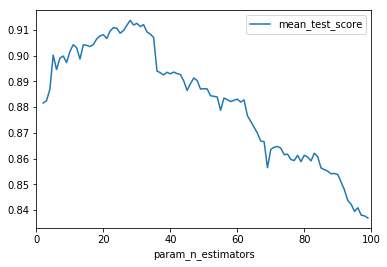

In [42]:
fig = plt.figure()
ax = fig.gca()
GB_results.plot(ax=ax , x ='param_n_estimators', y = 'mean_test_score')
ax.set_xlim(0,100)



In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

In [92]:
#model Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 1 , min_samples_leaf=1)
n_range1= range(2,10)
n_range2 = range(2,4)
param_grid = {'max_depth': n_range1 , 'min_samples_leaf': n_range2  }
grid = GridSearchCV(model, param_grid , cv =10 , scoring = 'accuracy' , n_jobs = -1)
# n_jobs = -1 for parrallel processing if the HW and SW suppots it. 

In [93]:
grid.fit(X , y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 10), 'min_samples_leaf': range(2, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [94]:
DT_results = pd.DataFrame(grid.cv_results_).sort_values(by = 'param_min_samples_leaf')
# Save the dataframe
DT_results.to_csv('../code/DT_results.csv' , index= False)

In [95]:
DT_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.541367,0.059651,0.031433,0.012278,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.882560,0.879752,0.875504,...,0.897537,0.896841,0.882568,0.882568,0.882568,0.882568,0.882568,0.882560,0.886941,0.006684
2,1.529768,0.173566,0.023687,0.003974,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.887097,0.884361,0.884217,...,0.904417,0.904129,0.882568,0.882568,0.882568,0.882568,0.882568,0.882560,0.891351,0.010761
4,1.645542,0.295392,0.020748,0.009194,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.878816,0.884361,0.883497,...,0.907281,0.906785,0.918914,0.914858,0.918370,0.921074,0.917322,0.916739,0.914287,0.005066
6,2.498547,0.190702,0.026485,0.004151,5,2,"{'max_depth': 5, 'min_samples_leaf': 2}",0.922667,0.890841,0.919859,...,0.922242,0.914802,0.942108,0.937419,0.938436,0.942380,0.938764,0.939292,0.932494,0.009347
8,2.483922,0.199988,0.026786,0.008514,6,2,"{'max_depth': 6, 'min_samples_leaf': 2}",0.941028,0.808468,0.478471,...,0.949236,0.940460,0.944428,0.945404,0.946852,0.943660,0.946820,0.946773,0.945579,0.002295
10,2.715206,0.126828,0.025259,0.005333,7,2,"{'max_depth': 7, 'min_samples_leaf': 2}",0.941460,0.809116,0.393505,...,0.951693,0.949116,0.950700,0.947612,0.948588,0.950284,0.948260,0.948757,0.949120,0.001481
12,3.055566,0.252283,0.029035,0.012738,8,2,"{'max_depth': 8, 'min_samples_leaf': 2}",0.941028,0.546875,0.399266,...,0.957301,0.954789,0.952381,0.952013,0.953101,0.951821,0.953421,0.953061,0.953714,0.001765
14,3.426147,0.221028,0.022987,0.005136,9,2,"{'max_depth': 9, 'min_samples_leaf': 2}",0.922595,0.546371,0.366719,...,0.959813,0.959133,0.954229,0.954085,0.954781,0.953701,0.955117,0.954533,0.955786,0.002115
1,1.474334,0.054787,0.037751,0.013121,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.882560,0.879752,0.875504,...,0.897537,0.896841,0.882568,0.882568,0.882568,0.882568,0.882568,0.882560,0.886941,0.006684
3,1.433268,0.122971,0.029634,0.008669,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.887097,0.884361,0.884217,...,0.904417,0.904129,0.882568,0.882568,0.882568,0.882568,0.882568,0.882560,0.891351,0.010761


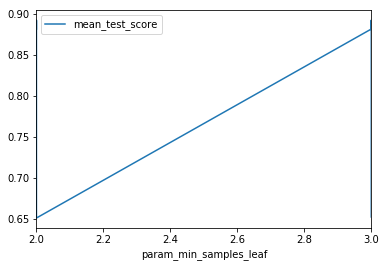

In [96]:
DT_results.plot(x ='param_min_samples_leaf', y = 'mean_test_score')

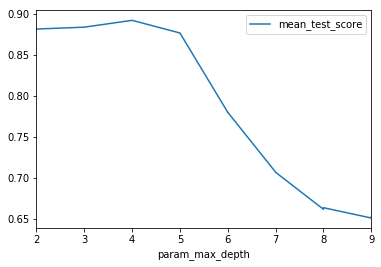

In [97]:
DT_results = pd.DataFrame(grid.cv_results_).sort_values(by = 'param_max_depth')
DT_results.plot(x ='param_max_depth', y = 'mean_test_score')

In [98]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8921435206186681
{'max_depth': 4, 'min_samples_leaf': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [85]:
#model RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1)
n_range= range(2,30)
param_grid = {'n_estimators': n_range }
grid = GridSearchCV(model, param_grid , cv =10 , scoring = 'accuracy' , n_jobs = -1)
# n_jobs = -1 for parrallel processing if the HW and SW suppots it. 

In [86]:
grid.fit(X , y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(2, 30)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [87]:
RF_results = pd.DataFrame(grid.cv_results_).sort_values(by = 'param_n_estimators')
# Save the dataframe
RF_results.to_csv('../code/RF_results.csv' , index= False)

In [88]:
RF_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.670944,0.281835,0.042477,0.014751,2,{'n_estimators': 2},0.855415,0.820421,0.480775,0.485743,...,0.975110,0.972062,0.970742,0.969534,0.969782,0.968750,0.968886,0.970046,0.970455,0.001882
1,2.653290,0.185823,0.037380,0.008680,3,{'n_estimators': 3},0.906250,0.897033,0.704493,0.585181,...,0.990207,0.989967,0.988607,0.988367,0.988663,0.988407,0.988719,0.989559,0.989170,0.000685
2,2.988328,0.416786,0.040577,0.005966,4,{'n_estimators': 4},0.912514,0.850014,0.586982,0.378888,...,0.992063,0.991607,0.990655,0.991207,0.991007,0.990511,0.990975,0.990927,0.991158,0.000447
3,3.797928,0.675358,0.058468,0.020866,5,{'n_estimators': 5},0.917483,0.862615,0.670147,0.758857,...,0.994296,0.993776,0.993384,0.992967,0.993208,0.992663,0.993296,0.993152,0.993406,0.000447
4,3.960905,0.788345,0.054071,0.012517,6,{'n_estimators': 6},0.914171,0.776498,0.567684,0.646961,...,0.995336,0.994936,0.994896,0.995072,0.994736,0.994488,0.994880,0.995072,0.994936,0.000217
5,4.917729,0.945387,0.060467,0.012103,7,{'n_estimators': 7},0.929075,0.853471,0.686492,0.652794,...,0.995928,0.995424,0.995248,0.995104,0.995216,0.994704,0.995024,0.995088,0.995255,0.000346
6,4.912890,0.489755,0.059469,0.007140,8,{'n_estimators': 8},0.931308,0.886737,0.399986,0.554940,...,0.997184,0.996456,0.996520,0.996160,0.996184,0.996312,0.995976,0.996352,0.996391,0.000310
7,7.159910,1.731893,0.092010,0.021551,9,{'n_estimators': 9},0.929868,0.872480,0.663666,0.673819,...,0.996952,0.996704,0.996392,0.995896,0.996048,0.995960,0.996008,0.996104,0.996309,0.000364
8,6.037272,0.611226,0.078165,0.024371,10,{'n_estimators': 10},0.929219,0.881480,0.451829,0.534418,...,0.997488,0.997384,0.997048,0.996920,0.997192,0.997184,0.996856,0.997040,0.997157,0.000187
9,7.817582,0.795230,0.117485,0.030610,11,{'n_estimators': 11},0.930084,0.849654,0.632560,0.649482,...,0.997832,0.997288,0.996848,0.996936,0.996960,0.996832,0.996808,0.996768,0.997056,0.000325


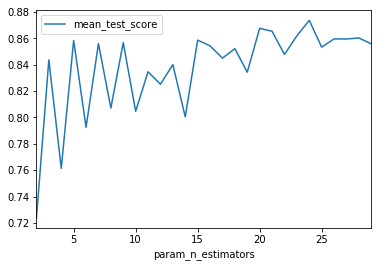

In [90]:
RF_results.plot(x ='param_n_estimators', y = 'mean_test_score')

In [91]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8736454035527329
{'n_estimators': 24}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Final Models

In [16]:
target_col =  target_col

In [17]:
X = mydata[feature_cols].fillna(0)
y = mydata[target_col]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
#model1 RandomForest
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=24)

In [47]:
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
y_pred1 = model1.predict(X_test)
# Model Accuracy
print( accuracy_score(y_test, y_pred1))

0.9685666666666667


In [49]:
#model2 Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth = 4 , min_samples_leaf= 2)

In [50]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
y_pred2 = model2.predict(X_test)
# Model Accuracy
print( accuracy_score(y_test, y_pred2))

0.8472


In [52]:
#Model Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(n_estimators=30, learning_rate=1.0, max_depth=1, random_state=0)


In [53]:
model3.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [54]:
y_pred3 = model3.predict(X_test)
# Model Accuracy
print( accuracy_score(y_test, y_pred3))

0.8505333333333334


## Evaluation

Regression problem (R squared , goodness of fit , AIC (Akaike information criterion) , RMSE (root mean square error)
Classification (Confucion matric , ROC (receiver opecrating charchritices) , Accurracy , Recall , Prescision)
compare performnce between diffrent models (contingency tables , multivariate analysis of variance)


In [112]:
def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
     
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 


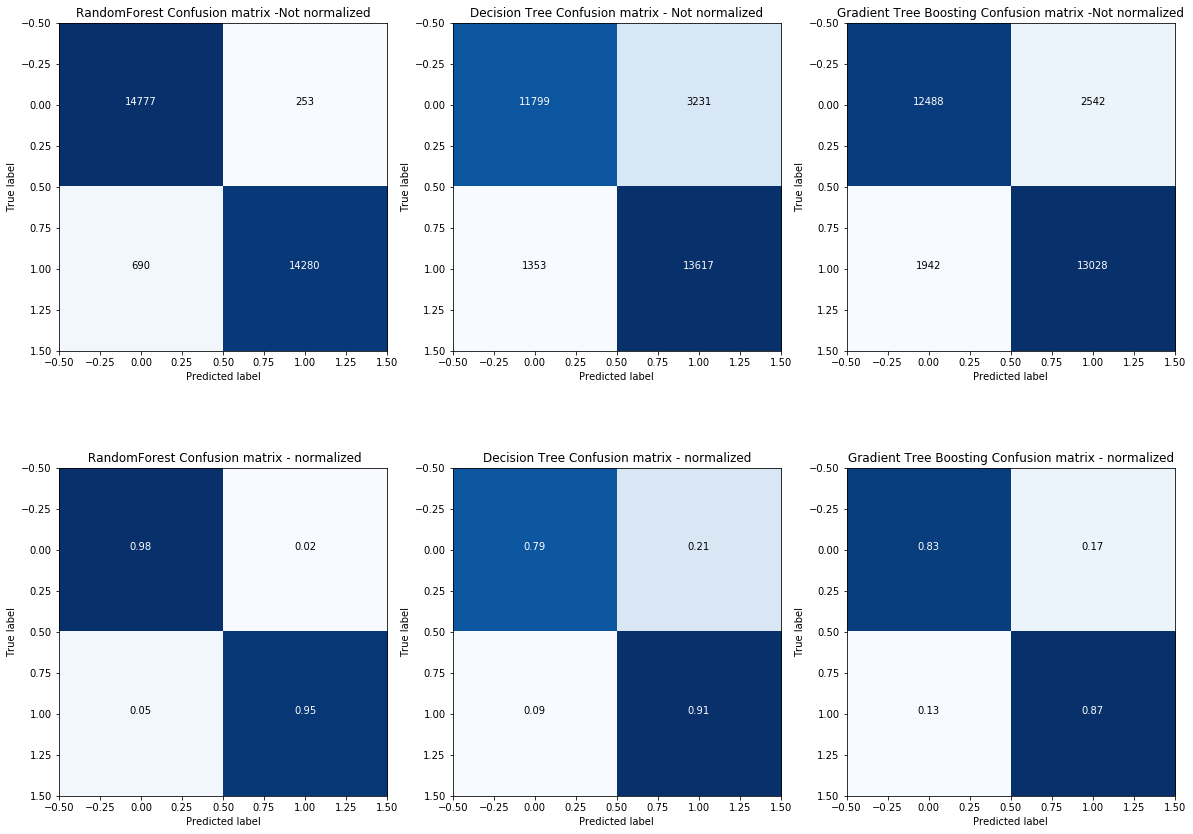

In [117]:
plt.figure(figsize=(20,15))


#model1 RandomForest
cnf_matrix = confusion_matrix(y_test, y_pred1)
plt.subplot(2,3,1)
plot_confusion_matrix(cnf_matrix, title='RandomForest Confusion matrix -Not normalized')
plt.subplot(2,3,4)
plot_confusion_matrix(cnf_matrix, normalize=True ,  title=' RandomForest Confusion matrix - normalized')

#model2
cnf_matrix = confusion_matrix(y_test, y_pred2)
plt.subplot(2,3,2)
plot_confusion_matrix(cnf_matrix, title='Decision Tree Confusion matrix - Not normalized')
plt.subplot(2,3,5)
plot_confusion_matrix(cnf_matrix, normalize=True, title='Decision Tree Confusion matrix - normalized')

#model3
cnf_matrix = confusion_matrix(y_test, y_pred3)
plt.subplot(2,3,3)
plot_confusion_matrix(cnf_matrix, title='Gradient Tree Boosting Confusion matrix -Not normalized')
plt.subplot(2,3,6)
plot_confusion_matrix(cnf_matrix, normalize=True , title='Gradient Tree Boosting Confusion matrix - normalized')

 



In [270]:
#ROC 

In [121]:
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, precision_score, r2_score, roc_auc_score, roc_curve

In [122]:
def plot_roc(model, varname):
    y_pp = model.predict_proba(X_test)[:, 1]
    fpr_, tpr_, _ = roc_curve(y_test, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(5,4))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.4f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.4f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' ROC', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

   

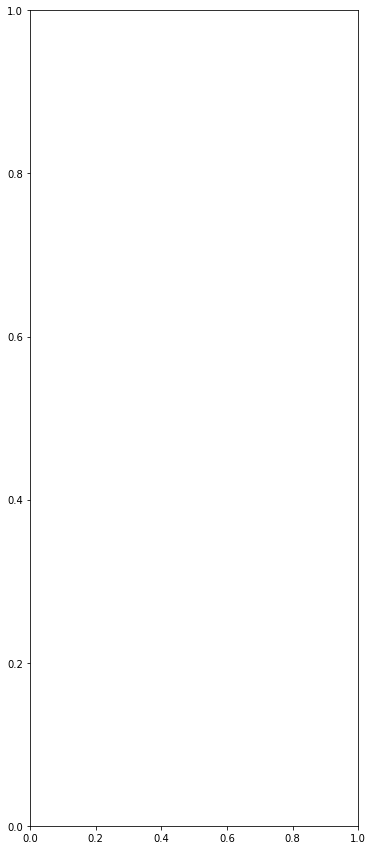

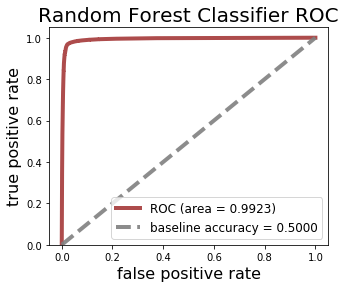

In [124]:
plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
plot_roc(model1, 'Random Forest Classifier')

#plt.subplot(1,3,2)
#plot_roc(model2, 'Random Forest Classifier')

#plt.subplot(1,3,3)
#plot_roc(model3, 'Random Forest Classifier')


## Improving the Model

deal with very high accuracy(Fixation varibales , overfitting)
deal with very low performance (many need new variables or more obervations)
itterate to improve the model performance 


## Conclusions

Infrences , dissucsuions
Threates to validity (Internal , External , construct) and propose the soultion that may mitigate these threates
Next/ future steps
